Saving diabetes.csv to diabetes.csv


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4808 - loss: 0.7690 - val_accuracy: 0.6187 - val_loss: 0.6613
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6395 - loss: 0.6523 - val_accuracy: 0.7063 - val_loss: 0.6095
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7086 - loss: 0.6042 - val_accuracy: 0.7312 - val_loss: 0.5650
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7286 - loss: 0.5661 - val_accuracy: 0.7437 - val_loss: 0.5307
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7197 - loss: 0.5422 - val_accuracy: 0.7437 - val_loss: 0.5107
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7515 - loss: 0.5155 - val_accuracy: 0.7375 - val_loss: 0.4977
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7766 - loss: 0.4901 - val_accuracy: 0.7375 - val_loss: 0.4880
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7776 - loss: 0.4991 - val_accuracy: 0.7312 - val_loss:

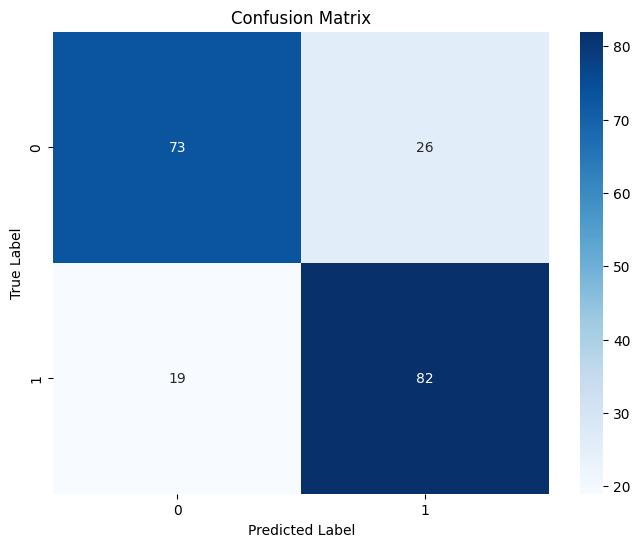

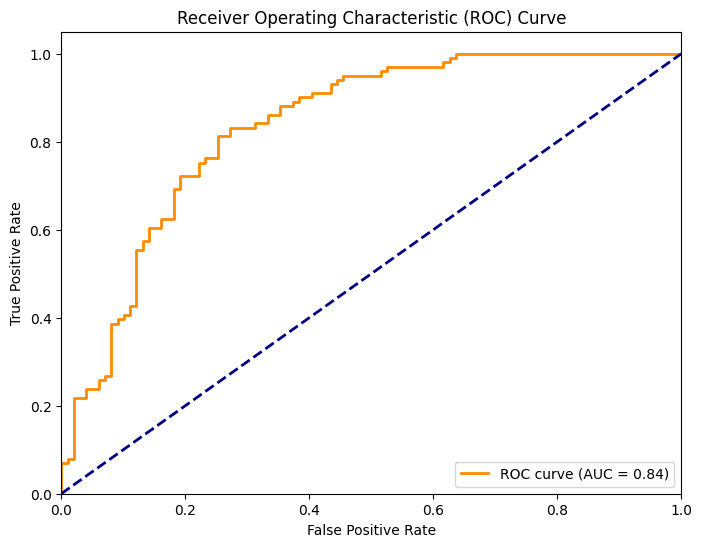

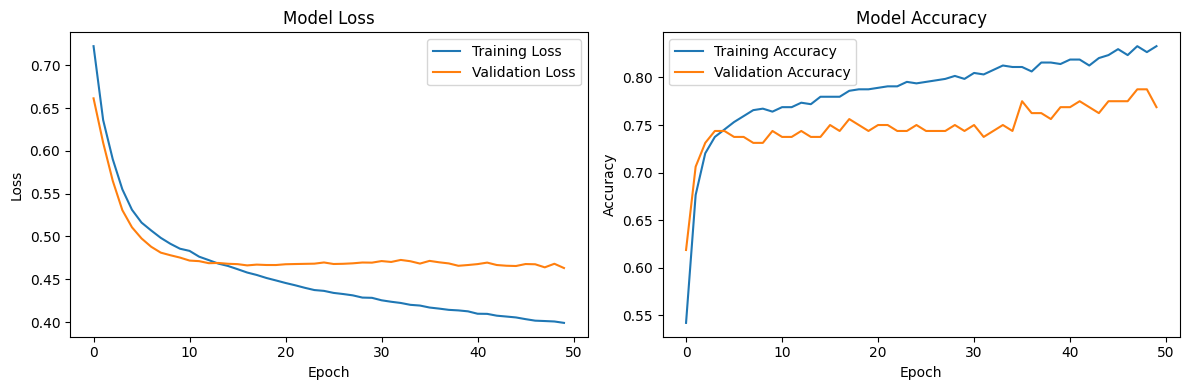

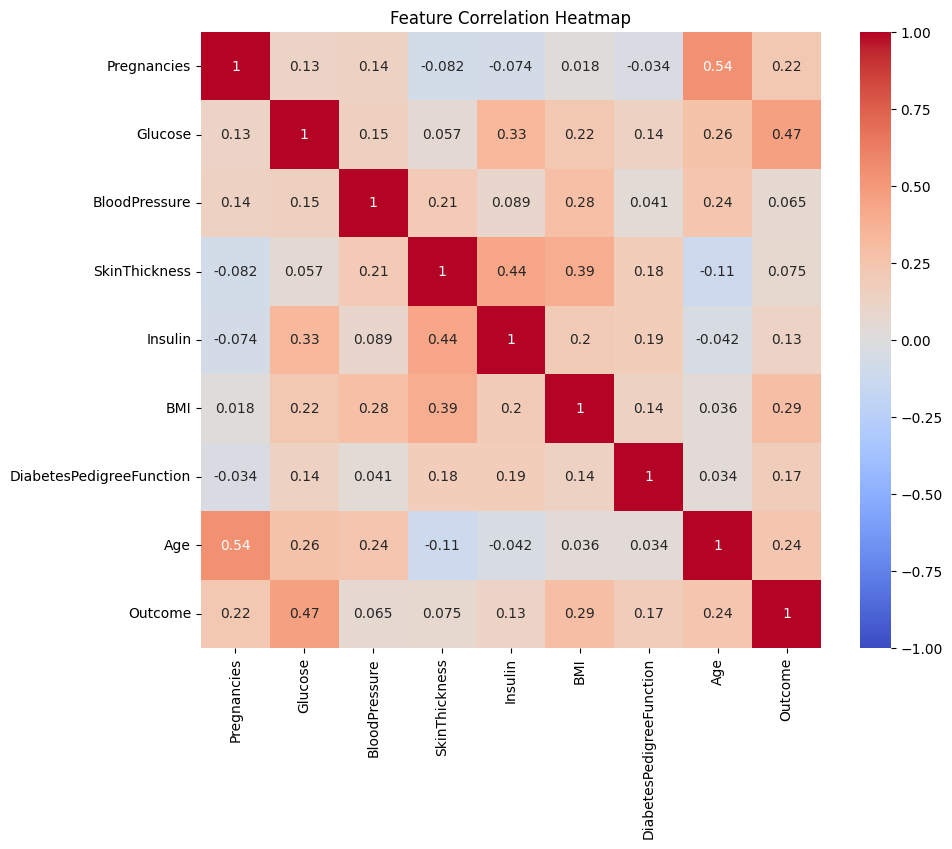

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History

# Load data from CSV
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))  # Assumes single CSV file

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Check for imbalance and apply SMOTE if needed
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and store history
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Loss and Accuracy Curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Heatmap of feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

Saving diabetes.csv to diabetes.csv
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5448 - loss: 0.6853 - val_accuracy: 0.6500 - val_loss: 0.6327
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6406 - loss: 0.6330 - val_accuracy: 0.7188 - val_loss: 0.5819
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.5939 - val_accuracy: 0.7375 - val_loss: 0.5436
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7529 - loss: 0.5521 - val_accuracy: 0.7437 - val_loss: 0.5186
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7465 - loss: 0.5378 - val_accuracy: 0.7250 - val_loss: 0.4954
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7285 - loss: 0.5250 - val_accuracy: 0.7375 - val_loss: 0.4843
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7303 - loss: 0.5559 - val_accuracy: 0.7500 - val_loss: 0.4788
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7361 - loss: 0.5234 - val_accuracy: 0.7500 - val_loss: 0.

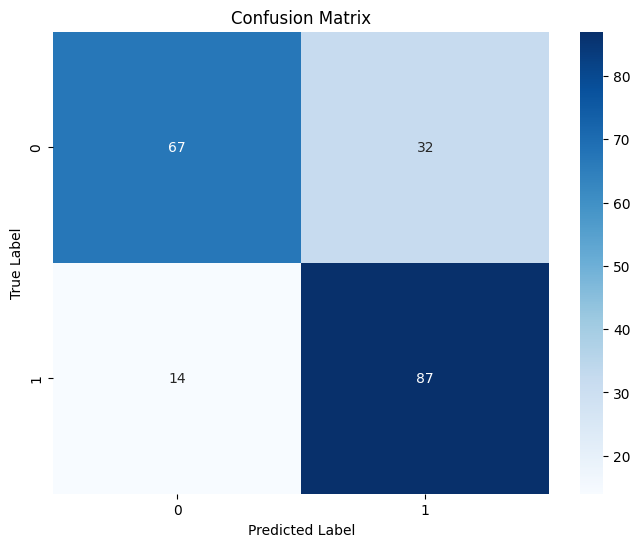

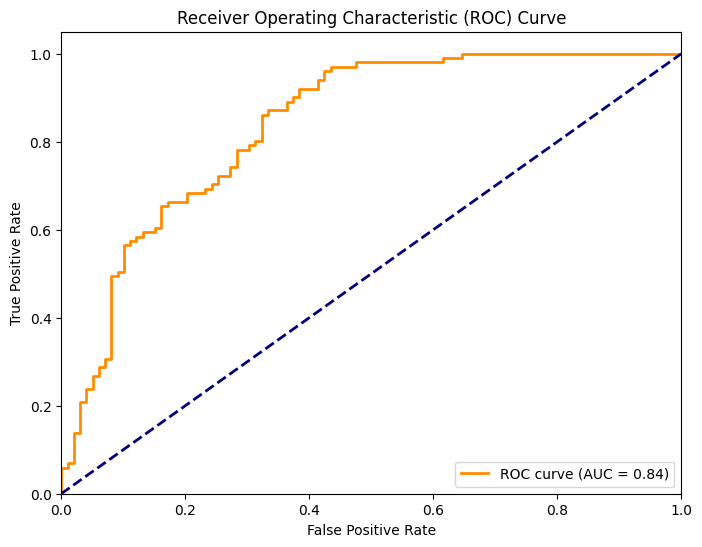

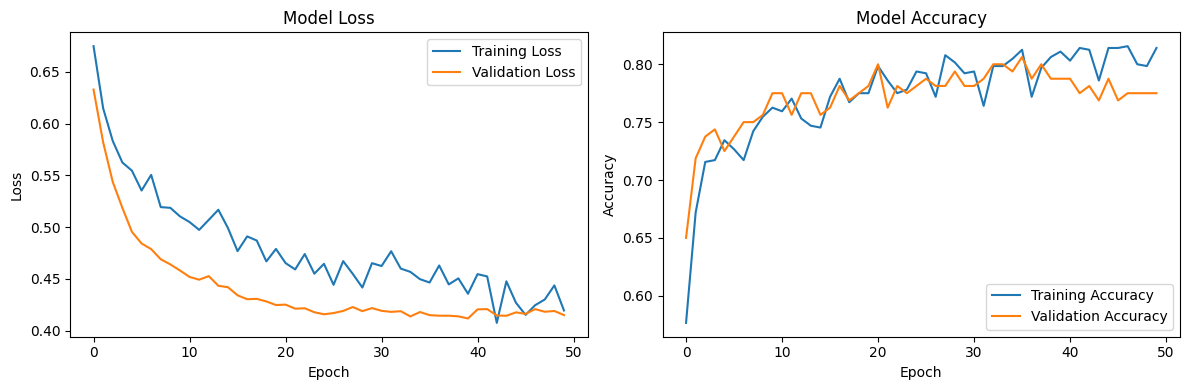

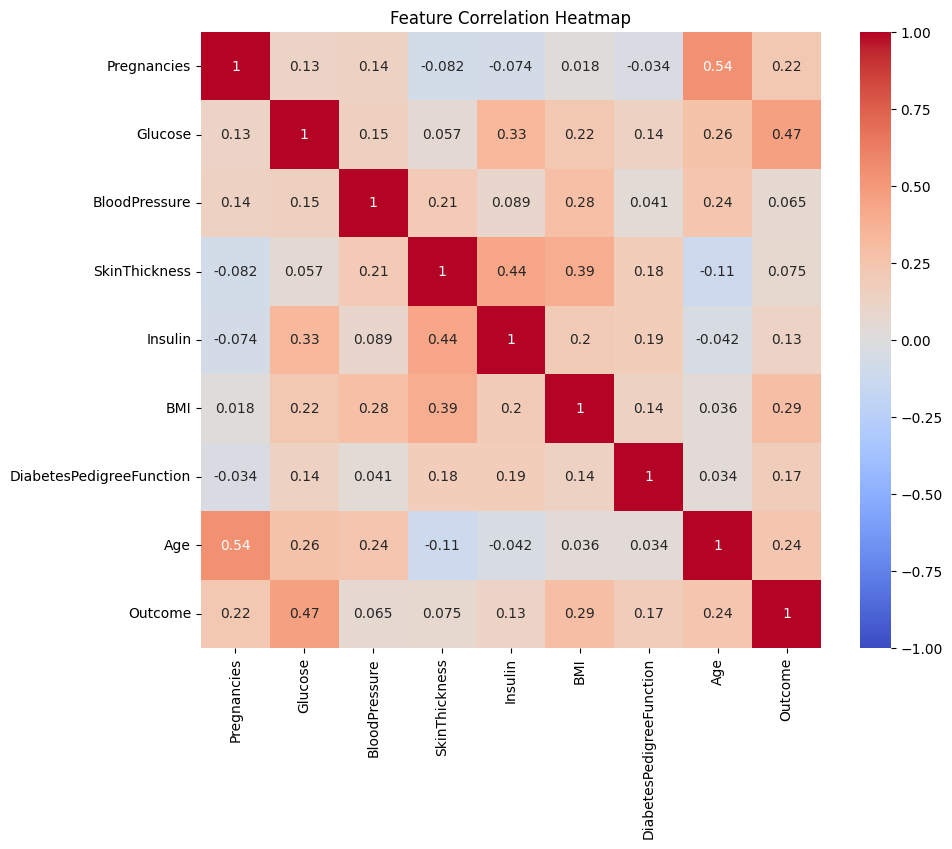

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import History, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load data from CSV
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))  # Assumes single CSV file

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Check for imbalance and apply SMOTE if needed
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the enhanced neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a custom learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model and store history
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Loss and Accuracy Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Heatmap of feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

Saving diabetes.csv to diabetes.csv
Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4974 - loss: 1.7844 - val_accuracy: 0.6597 - val_loss: 1.4191
Epoch 2/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5801 - loss: 1.5864 - val_accuracy: 0.6944 - val_loss: 1.3448
Epoch 3/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6044 - loss: 1.5009 - val_accuracy: 0.6944 - val_loss: 1.2925
Epoch 4/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6211 - loss: 1.4285 - val_accuracy: 0.7361 - val_loss: 1.2551
Epoch 5/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6559 - loss: 1.3806 - val_accuracy: 0.7153 - val_loss: 1.2404
Epoch 6/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6967 - loss: 1.3151 - val_accuracy: 0.7361 - val_loss: 1.2147
Epoch 7/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7534 - loss: 1.2438 - val_accuracy: 0.7569 - val_loss: 1.1898
Epoch 8/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6598 - loss: 1.3165 - val_accuracy: 0.7569 - val_loss: 1.1

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


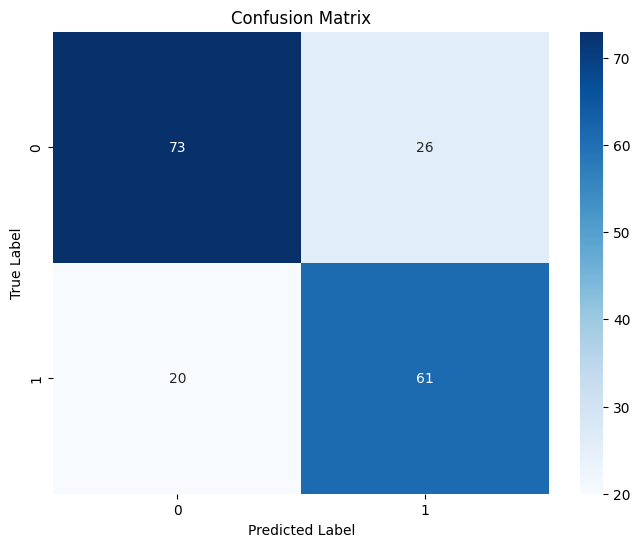

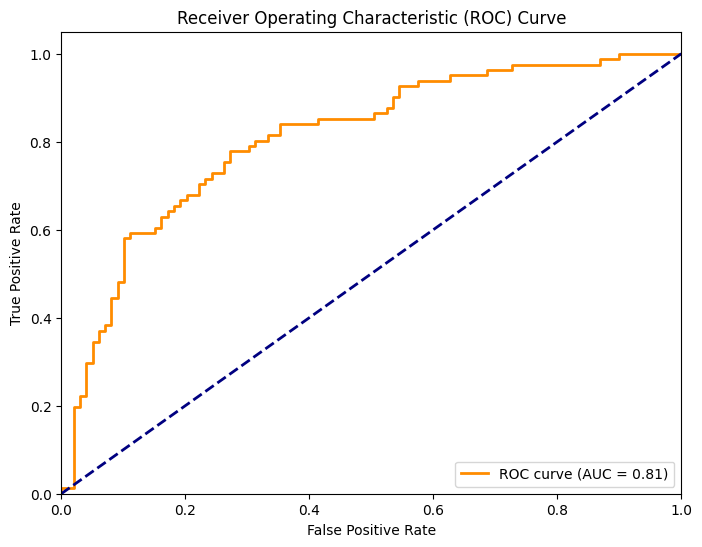

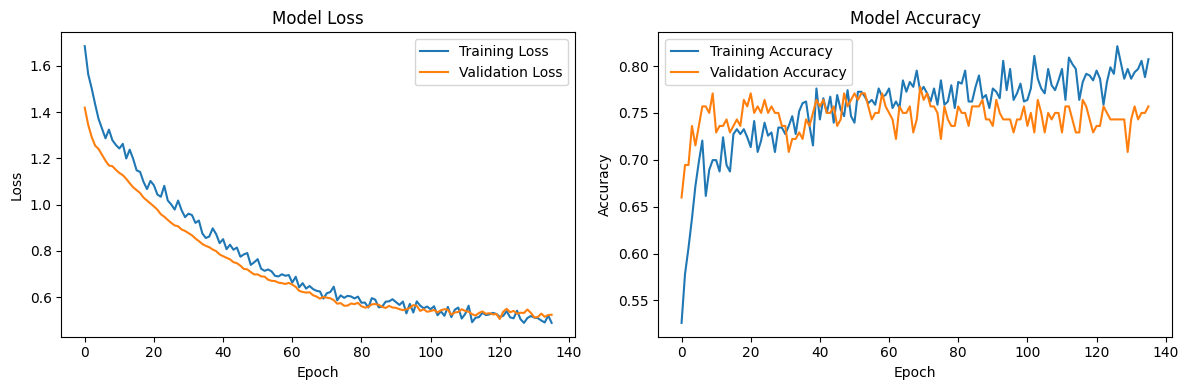

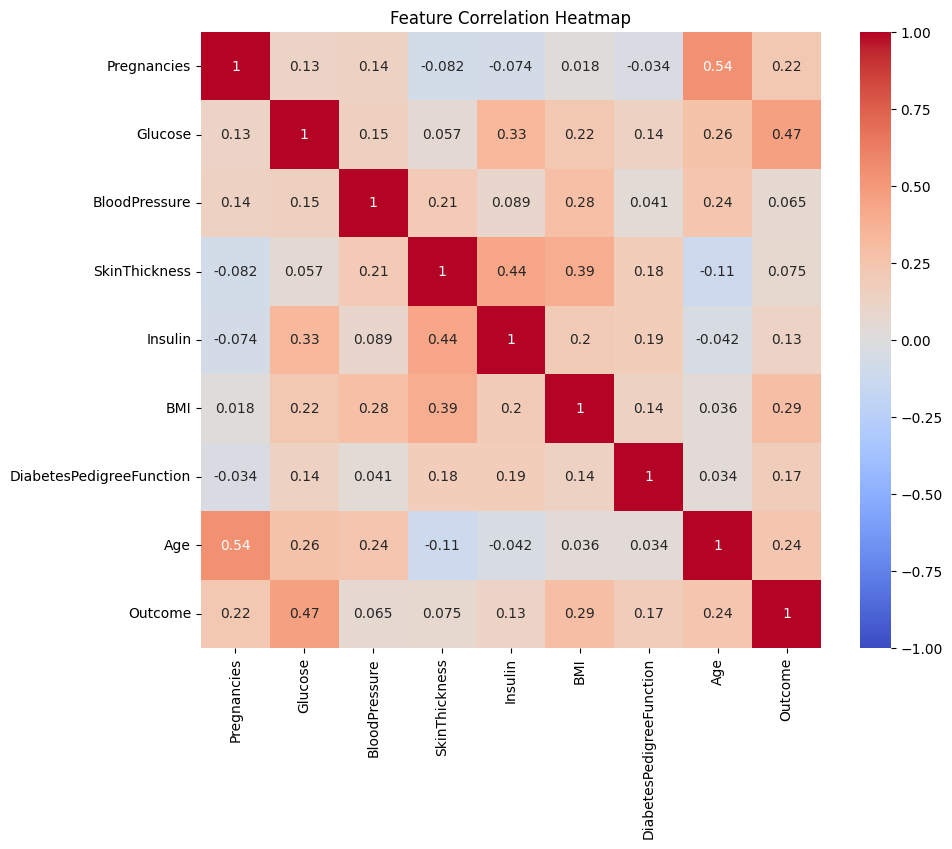

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import History, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Load data from CSV
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))  # Assumes single CSV file

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Aggressive SMOTE for data augmentation
smote = SMOTE(sampling_strategy=0.8, random_state=42, k_neighbors=5)
X, y = smote.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build an advanced neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a custom learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model and store history
history = model.fit(X_train, y_train, epochs=150, batch_size=6, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Loss and Accuracy Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Heatmap of feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

Saving diabetes.csv to diabetes.csv
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4705 - loss: 2.4259 - val_accuracy: 0.5329 - val_loss: 2.1117
Epoch 2/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4994 - loss: 2.2544 - val_accuracy: 0.6118 - val_loss: 2.0190
Epoch 3/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5853 - loss: 2.1123 - val_accuracy: 0.6908 - val_loss: 1.9307
Epoch 4/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6339 - loss: 2.0399 - val_accuracy: 0.7039 - val_loss: 1.9042
Epoch 5/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6752 - loss: 1.9829 - val_accuracy: 0.7171 - val_loss: 1.8627
Epoch 6/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6561 - loss: 1.9673 - val_accuracy: 0.7237 - val_loss: 1.8447
Epoch 7/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6194 - loss: 1.9919 - val_accuracy: 0.7105 - val_loss: 1.8153
Epoch 8/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6616 - loss: 1.9951 - val_accuracy: 0.7303

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


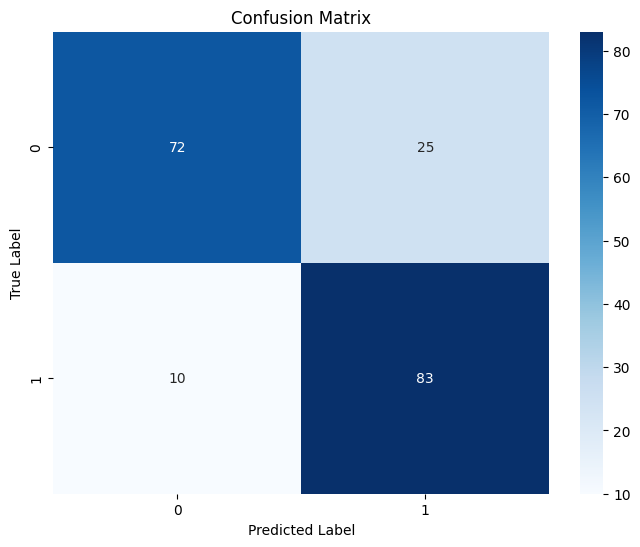

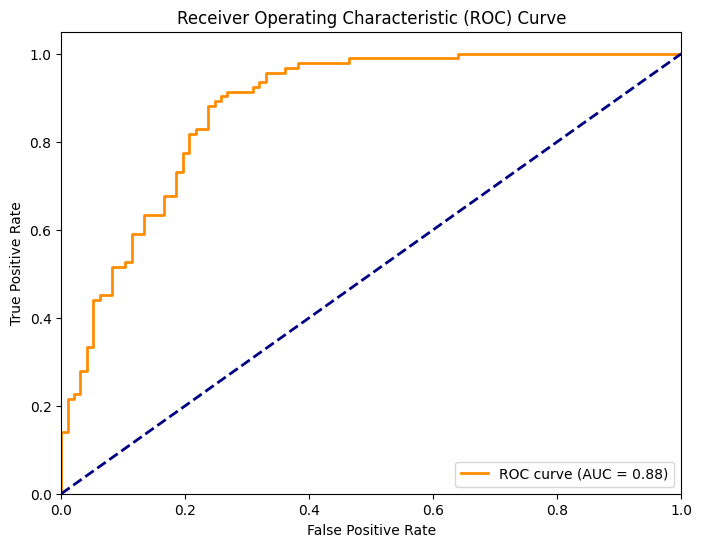

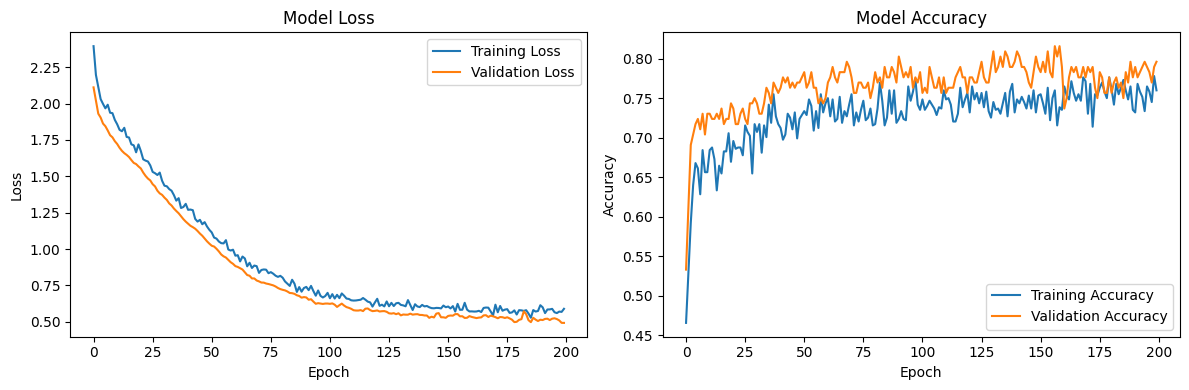

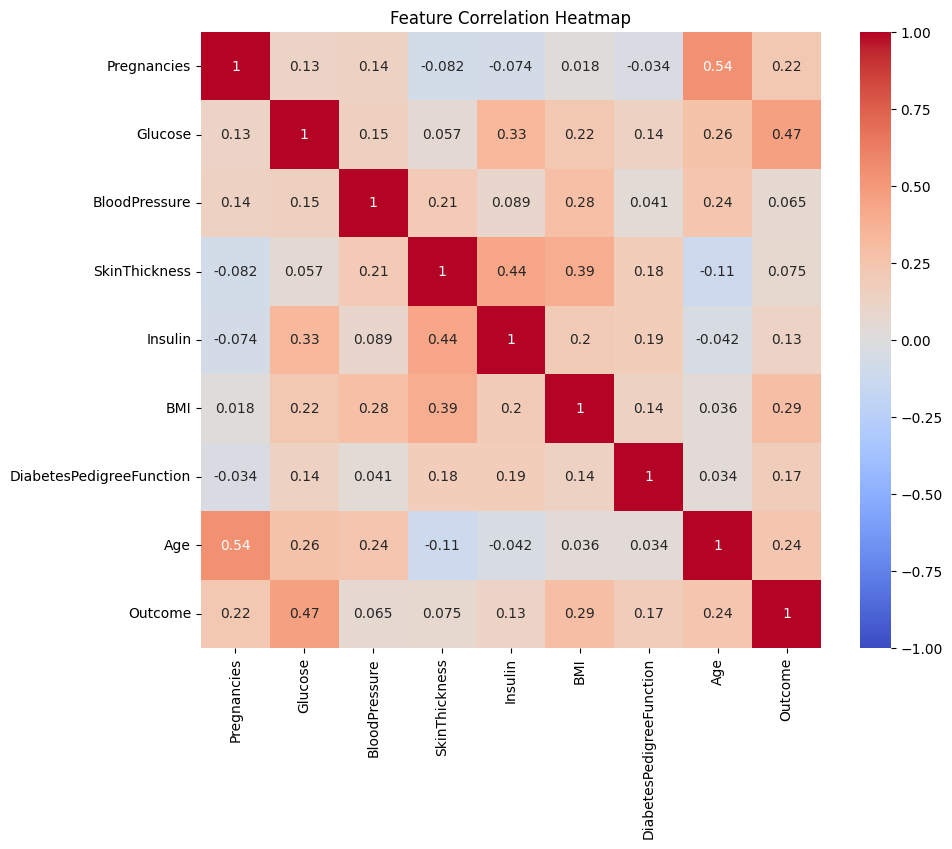

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import History, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Load data from CSV
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Aggressive SMOTE for data augmentation
smote = SMOTE(sampling_strategy=0.9, random_state=42, k_neighbors=5)
X, y = smote.fit_resample(X, y)

# Feature selection with RFE
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=6, step=1)
X = rfe.fit_transform(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build an optimized neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a custom learning rate
optimizer = Adam(learning_rate=0.0003)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model and store history
history = model.fit(X_train, y_train, epochs=200, batch_size=4, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Loss and Accuracy Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Heatmap of feature correlations (using original data)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

🚀 Starting Enhanced Imbalanced Dataset Classification


Saving diabetes.csv to diabetes (15).csv
=== Dataset Overview ===
Dataset shape: (768, 9)

Target distribution:
Outcome
0    500
1    268
Name: count, dtype: int64
Imbalance ratio: 1.87:1

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,993 (50.75 KB)

 Trainable params: 12,513 (48.88 KB)

 Non-trainable params: 480 (1.88 KB)

None

🎯 Training model with advanced callbacks...
Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.5634 - loss: 7.6437 - precision: 0.6285 - recall: 0.5422
Epoch 1: val_loss improved from inf to 7.34955, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 544ms/step - accuracy: 0.5634 - loss: 7.6402 - precision: 0.6292 - recall: 0.5432 - val_accuracy: 0.6824 - val_loss: 7.3495 - val_precision: 0.6406 - val_recall: 0.9111 - learning_rate: 0.0010
Epoch 2/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 7.4847 - precision: 0.6000 - recall: 0.4737
Epoch 2: val_loss improved from 7.34955 to 7.18887, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6091 - loss: 7.3781 - precision: 0.6684 - recall: 0.6150 - val_accuracy: 0.7529 - val_loss: 7.1889 - val_precision: 0.7069 - val_recall: 0.9111 - learning_rate: 0.0010
Epoch 3/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5000 - loss: 7.3149 - precision: 0.5333 - recall: 0.4706
Epoch 3: val_loss improved from 7.18887 to 7.02779, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6364 - loss: 7.1612 - precision: 0.7032 - recall: 0.6054 - val_accuracy: 0.8118 - val_loss: 7.0278 - val_precision: 0.7636 - val_recall: 0.9333 - learning_rate: 0.0010
Epoch 4/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.6562 - loss: 7.0091 - precision: 0.7368 - recall: 0.7000
Epoch 4: val_loss improved from 7.02779 to 6.85861, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6997 - loss: 6.9652 - precision: 0.7764 - recall: 0.6795 - val_accuracy: 0.8471 - val_loss: 6.8586 - val_precision: 0.8077 - val_recall: 0.9333 - learning_rate: 0.0010
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7248 - loss: 6.7250 - precision: 0.7732 - recall: 0.7185 
Epoch 5: val_loss improved from 6.85861 to 6.68957, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7264 - loss: 6.7212 - precision: 0.7759 - recall: 0.7195 - val_accuracy: 0.8824 - val_loss: 6.6896 - val_precision: 0.8302 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 6/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7812 - loss: 6.6275 - precision: 0.9375 - recall: 0.7143
Epoch 6: val_loss improved from 6.68957 to 6.51406, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7626 - loss: 6.5836 - precision: 0.8324 - recall: 0.7390 - val_accuracy: 0.8824 - val_loss: 6.5141 - val_precision: 0.8431 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 7/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7812 - loss: 6.4770 - precision: 0.8947 - recall: 0.7727
Epoch 7: val_loss improved from 6.51406 to 6.34176, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7784 - loss: 6.4012 - precision: 0.8233 - recall: 0.7879 - val_accuracy: 0.8941 - val_loss: 6.3418 - val_precision: 0.8750 - val_recall: 0.9333 - learning_rate: 0.0010
Epoch 8/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7500 - loss: 6.2528 - precision: 0.7500 - recall: 0.8333
Epoch 8: val_loss improved from 6.34176 to 6.16159, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7712 - loss: 6.2137 - precision: 0.8072 - recall: 0.7927 - val_accuracy: 0.8941 - val_loss: 6.1616 - val_precision: 0.8750 - val_recall: 0.9333 - learning_rate: 0.0010
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7763 - loss: 6.0517 - precision: 0.8283 - recall: 0.7635  
Epoch 9: val_loss improved from 6.16159 to 5.98377, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7776 - loss: 6.0481 - precision: 0.8296 - recall: 0.7651 - val_accuracy: 0.9176 - val_loss: 5.9838 - val_precision: 0.8958 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 10/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 3s 316ms/step - accuracy: 0.7812 - loss: 5.9410 - precision: 0.7222 - recall: 0.8667
Epoch 10: val_loss improved from 5.98377 to 5.80692, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8281 - loss: 5.8448 - precision: 0.8358 - recall: 0.8591 - val_accuracy: 0.9294 - val_loss: 5.8069 - val_precision: 0.8980 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 11/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8125 - loss: 5.8549 - precision: 0.9048 - recall: 0.8261
Epoch 11: val_loss improved from 5.80692 to 5.63508, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8085 - loss: 5.7256 - precision: 0.8410 - recall: 0.8351 - val_accuracy: 0.9294 - val_loss: 5.6351 - val_precision: 0.8980 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 12/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 5.5030 - precision: 0.8333 - recall: 1.0000
Epoch 12: val_loss improved from 5.63508 to 5.46475, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8641 - loss: 5.5096 - precision: 0.8840 - recall: 0.8708 - val_accuracy: 0.9294 - val_loss: 5.4647 - val_precision: 0.8980 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 13/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8877 - loss: 5.3378 - precision: 0.8841 - recall: 0.9237 
Epoch 13: val_loss improved from 5.46475 to 5.30270, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8866 - loss: 5.3354 - precision: 0.8843 - recall: 0.9214 - val_accuracy: 0.9294 - val_loss: 5.3027 - val_precision: 0.8980 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 14/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9062 - loss: 5.1302 - precision: 1.0000 - recall: 0.8571
Epoch 14: val_loss improved from 5.30270 to 5.14265, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8829 - loss: 5.1782 - precision: 0.9148 - recall: 0.8862 - val_accuracy: 0.9294 - val_loss: 5.1426 - val_precision: 0.8980 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 15/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9688 - loss: 4.9049 - precision: 0.9444 - recall: 1.0000
Epoch 15: val_loss improved from 5.14265 to 4.98251, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8791 - loss: 5.0295 - precision: 0.9044 - recall: 0.8847 - val_accuracy: 0.9059 - val_loss: 4.9825 - val_precision: 0.8936 - val_recall: 0.9333 - learning_rate: 0.0010
Epoch 16/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9062 - loss: 4.8493 - precision: 1.0000 - recall: 0.8421
Epoch 16: val_loss improved from 4.98251 to 4.82478, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8775 - loss: 4.8791 - precision: 0.9081 - recall: 0.8750 - val_accuracy: 0.9176 - val_loss: 4.8248 - val_precision: 0.9130 - val_recall: 0.9333 - learning_rate: 0.0010
Epoch 17/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8750 - loss: 4.8421 - precision: 0.9524 - recall: 0.8696
Epoch 17: val_loss improved from 4.82478 to 4.66965, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8725 - loss: 4.7542 - precision: 0.8747 - recall: 0.9093 - val_accuracy: 0.9176 - val_loss: 4.6697 - val_precision: 0.8958 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 18/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9688 - loss: 4.4698 - precision: 0.9375 - recall: 1.0000
Epoch 18: val_loss improved from 4.66965 to 4.51176, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9047 - loss: 4.5171 - precision: 0.9128 - recall: 0.9172 - val_accuracy: 0.9176 - val_loss: 4.5118 - val_precision: 0.8958 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 19/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.8750 - loss: 4.4347 - precision: 0.8500 - recall: 0.9444
Epoch 19: val_loss improved from 4.51176 to 4.35603, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9109 - loss: 4.3632 - precision: 0.9050 - recall: 0.9423 - val_accuracy: 0.9412 - val_loss: 4.3560 - val_precision: 0.9348 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 20/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8750 - loss: 4.2261 - precision: 0.8947 - recall: 0.8947
Epoch 20: val_loss improved from 4.35603 to 4.20674, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9008 - loss: 4.2241 - precision: 0.9076 - recall: 0.9219 - val_accuracy: 0.9294 - val_loss: 4.2067 - val_precision: 0.9149 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 21/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.9688 - loss: 4.0023 - precision: 0.9474 - recall: 1.0000
Epoch 21: val_loss improved from 4.20674 to 4.06346, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9129 - loss: 4.0947 - precision: 0.9093 - recall: 0.9403 - val_accuracy: 0.9412 - val_loss: 4.0635 - val_precision: 0.9348 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 22/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 1.0000 - loss: 3.8411 - precision: 1.0000 - recall: 1.0000
Epoch 22: val_loss improved from 4.06346 to 3.92317, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9133 - loss: 3.9408 - precision: 0.9323 - recall: 0.9119 - val_accuracy: 0.9529 - val_loss: 3.9232 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 23/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 3.8663 - precision: 0.9375 - recall: 0.8824
Epoch 23: val_loss improved from 3.92317 to 3.79179, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9202 - loss: 3.8118 - precision: 0.9355 - recall: 0.9209 - val_accuracy: 0.9412 - val_loss: 3.7918 - val_precision: 0.9348 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 24/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9062 - loss: 3.7133 - precision: 0.8889 - recall: 0.9412
Epoch 24: val_loss improved from 3.79179 to 3.66068, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9200 - loss: 3.6655 - precision: 0.9322 - recall: 0.9308 - val_accuracy: 0.9412 - val_loss: 3.6607 - val_precision: 0.9167 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 25/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9062 - loss: 3.5269 - precision: 0.9000 - recall: 0.9474
Epoch 25: val_loss improved from 3.66068 to 3.53640, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8914 - loss: 3.5494 - precision: 0.9025 - recall: 0.9086 - val_accuracy: 0.9412 - val_loss: 3.5364 - val_precision: 0.9167 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 26/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.8438 - loss: 3.5039 - precision: 0.7500 - recall: 1.0000
Epoch 26: val_loss improved from 3.53640 to 3.40728, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8911 - loss: 3.4193 - precision: 0.8821 - recall: 0.9266 - val_accuracy: 0.9529 - val_loss: 3.4073 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 27/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8438 - loss: 3.5096 - precision: 0.7222 - recall: 1.0000
Epoch 27: val_loss improved from 3.40728 to 3.28207, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8973 - loss: 3.3384 - precision: 0.8716 - recall: 0.9444 - val_accuracy: 0.9647 - val_loss: 3.2821 - val_precision: 0.9565 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 28/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.9062 - loss: 3.1874 - precision: 1.0000 - recall: 0.8750
Epoch 28: val_loss improved from 3.28207 to 3.16804, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9047 - loss: 3.1694 - precision: 0.9146 - recall: 0.9266 - val_accuracy: 0.9529 - val_loss: 3.1680 - val_precision: 0.9556 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 29/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9375 - loss: 3.0196 - precision: 0.9474 - recall: 0.9474
Epoch 29: val_loss improved from 3.16804 to 3.05043, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9301 - loss: 3.0200 - precision: 0.9500 - recall: 0.9302 - val_accuracy: 0.9294 - val_loss: 3.0504 - val_precision: 0.9535 - val_recall: 0.9111 - learning_rate: 0.0010
Epoch 30/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8125 - loss: 3.0664 - precision: 1.0000 - recall: 0.7500
Epoch 30: val_loss improved from 3.05043 to 2.93569, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8894 - loss: 2.9334 - precision: 0.9450 - recall: 0.8788 - val_accuracy: 0.9647 - val_loss: 2.9357 - val_precision: 0.9565 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 31/200
 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9253 - loss: 2.8207 - precision: 0.9096 - recall: 0.9651 
Epoch 31: val_loss improved from 2.93569 to 2.82883, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9270 - loss: 2.7964 - precision: 0.9224 - recall: 0.9533 - val_accuracy: 0.9529 - val_loss: 2.8288 - val_precision: 0.9556 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 32/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9375 - loss: 2.6610 - precision: 0.9444 - recall: 0.9444
Epoch 32: val_loss improved from 2.82883 to 2.72007, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9229 - loss: 2.6976 - precision: 0.9400 - recall: 0.9259 - val_accuracy: 0.9529 - val_loss: 2.7201 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 33/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8750 - loss: 2.6834 - precision: 0.7778 - recall: 1.0000
Epoch 33: val_loss improved from 2.72007 to 2.60662, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9221 - loss: 2.6135 - precision: 0.9037 - recall: 0.9628 - val_accuracy: 0.9529 - val_loss: 2.6066 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 34/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9375 - loss: 2.4348 - precision: 1.0000 - recall: 0.9091
Epoch 34: val_loss improved from 2.60662 to 2.50441, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8963 - loss: 2.5405 - precision: 0.9044 - recall: 0.9190 - val_accuracy: 0.9647 - val_loss: 2.5044 - val_precision: 0.9565 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 35/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.9688 - loss: 2.4007 - precision: 0.9474 - recall: 1.0000
Epoch 35: val_loss improved from 2.50441 to 2.41021, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9446 - loss: 2.3808 - precision: 0.9619 - recall: 0.9421 - val_accuracy: 0.9294 - val_loss: 2.4102 - val_precision: 0.9535 - val_recall: 0.9111 - learning_rate: 0.0010
Epoch 36/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9062 - loss: 2.2865 - precision: 0.9444 - recall: 0.8947
Epoch 36: val_loss improved from 2.41021 to 2.31779, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9313 - loss: 2.2793 - precision: 0.9483 - recall: 0.9312 - val_accuracy: 0.9412 - val_loss: 2.3178 - val_precision: 0.9545 - val_recall: 0.9333 - learning_rate: 0.0010
Epoch 37/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9375 - loss: 2.2613 - precision: 0.8947 - recall: 1.0000
Epoch 37: val_loss improved from 2.31779 to 2.21706, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9274 - loss: 2.2097 - precision: 0.9341 - recall: 0.9425 - val_accuracy: 0.9529 - val_loss: 2.2171 - val_precision: 0.9556 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 38/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9375 - loss: 2.0467 - precision: 0.9444 - recall: 0.9444
Epoch 38: val_loss improved from 2.21706 to 2.12079, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9447 - loss: 2.0611 - precision: 0.9509 - recall: 0.9534 - val_accuracy: 0.9529 - val_loss: 2.1208 - val_precision: 0.9556 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 39/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9375 - loss: 2.0897 - precision: 0.8824 - recall: 1.0000
Epoch 39: val_loss improved from 2.12079 to 2.04466, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9227 - loss: 2.0488 - precision: 0.9321 - recall: 0.9332 - val_accuracy: 0.9529 - val_loss: 2.0447 - val_precision: 0.9556 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 40/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.9062 - loss: 2.0130 - precision: 0.8333 - recall: 1.0000
Epoch 40: val_loss improved from 2.04466 to 1.95629, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9114 - loss: 1.9909 - precision: 0.8946 - recall: 0.9497 - val_accuracy: 0.9529 - val_loss: 1.9563 - val_precision: 0.9556 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 41/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9375 - loss: 2.0264 - precision: 0.8824 - recall: 1.0000
Epoch 41: val_loss improved from 1.95629 to 1.89797, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9207 - loss: 1.9514 - precision: 0.8992 - recall: 0.9606 - val_accuracy: 0.9529 - val_loss: 1.8980 - val_precision: 0.9556 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 42/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9062 - loss: 1.8887 - precision: 0.9412 - recall: 0.8889
Epoch 42: val_loss improved from 1.89797 to 1.83467, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9368 - loss: 1.8227 - precision: 0.9404 - recall: 0.9485 - val_accuracy: 0.9647 - val_loss: 1.8347 - val_precision: 0.9375 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 43/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 1.0000 - loss: 1.6340 - precision: 1.0000 - recall: 1.0000
Epoch 43: val_loss improved from 1.83467 to 1.78420, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9602 - loss: 1.7072 - precision: 0.9615 - recall: 0.9682 - val_accuracy: 0.9529 - val_loss: 1.7842 - val_precision: 0.9556 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 44/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8438 - loss: 1.8995 - precision: 0.7222 - recall: 1.0000
Epoch 44: val_loss improved from 1.78420 to 1.71503, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8932 - loss: 1.7628 - precision: 0.8928 - recall: 0.9233 - val_accuracy: 0.9412 - val_loss: 1.7150 - val_precision: 0.9348 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 45/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9688 - loss: 1.5592 - precision: 0.9524 - recall: 1.0000
Epoch 45: val_loss improved from 1.71503 to 1.63774, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9265 - loss: 1.6296 - precision: 0.9391 - recall: 0.9375 - val_accuracy: 0.9529 - val_loss: 1.6377 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 46/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9375 - loss: 1.5221 - precision: 0.9444 - recall: 0.9444
Epoch 46: val_loss improved from 1.63774 to 1.56719, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9411 - loss: 1.5454 - precision: 0.9508 - recall: 0.9457 - val_accuracy: 0.9412 - val_loss: 1.5672 - val_precision: 0.9348 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 47/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9375 - loss: 1.4912 - precision: 0.8824 - recall: 1.0000
Epoch 47: val_loss improved from 1.56719 to 1.52106, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9173 - loss: 1.5258 - precision: 0.9486 - recall: 0.9093 - val_accuracy: 0.9529 - val_loss: 1.5211 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 48/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 1.0000 - loss: 1.3588 - precision: 1.0000 - recall: 1.0000
Epoch 48: val_loss improved from 1.52106 to 1.47804, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9622 - loss: 1.4011 - precision: 0.9796 - recall: 0.9549 - val_accuracy: 0.9412 - val_loss: 1.4780 - val_precision: 0.9348 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 49/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 1.0000 - loss: 1.2840 - precision: 1.0000 - recall: 1.0000
Epoch 49: val_loss improved from 1.47804 to 1.43886, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9225 - loss: 1.4595 - precision: 0.9184 - recall: 0.9472 - val_accuracy: 0.9529 - val_loss: 1.4389 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 50/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9062 - loss: 1.3665 - precision: 0.8750 - recall: 0.9333
Epoch 50: val_loss improved from 1.43886 to 1.37535, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9245 - loss: 1.3355 - precision: 0.9397 - recall: 0.9233 - val_accuracy: 0.9529 - val_loss: 1.3754 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 51/200
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9379 - loss: 1.3098 - precision: 0.9548 - recall: 0.9350
Epoch 51: val_loss improved from 1.37535 to 1.33107, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9378 - loss: 1.3012 - precision: 0.9546 - recall: 0.9357 - val_accuracy: 0.9529 - val_loss: 1.3311 - val_precision: 0.9184 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 52/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9099 - loss: 1.2696 - precision: 0.8936 - recall: 0.9516 
Epoch 52: val_loss improved from 1.33107 to 1.28683, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9112 - loss: 1.2683 - precision: 0.8954 - recall: 0.9522 - val_accuracy: 0.9529 - val_loss: 1.2868 - val_precision: 0.9184 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 53/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9646 - loss: 1.1550 - precision: 0.9817 - recall: 0.9569 
Epoch 53: val_loss improved from 1.28683 to 1.20980, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9631 - loss: 1.1568 - precision: 0.9802 - recall: 0.9558 - val_accuracy: 0.9529 - val_loss: 1.2098 - val_precision: 0.9184 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 54/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step - accuracy: 0.9375 - loss: 1.1705 - precision: 0.9333 - recall: 0.9333
Epoch 54: val_loss improved from 1.20980 to 1.17838, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9280 - loss: 1.1754 - precision: 0.9189 - recall: 0.9482 - val_accuracy: 0.9412 - val_loss: 1.1784 - val_precision: 0.9167 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 55/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.9688 - loss: 1.0893 - precision: 1.0000 - recall: 0.9474
Epoch 55: val_loss improved from 1.17838 to 1.14615, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9459 - loss: 1.1386 - precision: 0.9489 - recall: 0.9572 - val_accuracy: 0.9529 - val_loss: 1.1462 - val_precision: 0.9184 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 56/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9688 - loss: 1.0453 - precision: 1.0000 - recall: 0.9545
Epoch 56: val_loss improved from 1.14615 to 1.11730, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9582 - loss: 1.0675 - precision: 0.9597 - recall: 0.9706 - val_accuracy: 0.9412 - val_loss: 1.1173 - val_precision: 0.9000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 57/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 1.0036 - precision: 1.0000 - recall: 1.0000
Epoch 57: val_loss improved from 1.11730 to 1.07978, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9641 - loss: 1.0207 - precision: 0.9834 - recall: 0.9560 - val_accuracy: 0.9412 - val_loss: 1.0798 - val_precision: 0.9000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 58/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9688 - loss: 0.9643 - precision: 0.9500 - recall: 1.0000
Epoch 58: val_loss improved from 1.07978 to 1.06253, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9570 - loss: 0.9879 - precision: 0.9569 - recall: 0.9684 - val_accuracy: 0.9647 - val_loss: 1.0625 - val_precision: 0.9375 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 59/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9688 - loss: 0.9466 - precision: 0.9444 - recall: 1.0000
Epoch 59: val_loss improved from 1.06253 to 1.03823, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9282 - loss: 0.9877 - precision: 0.9611 - recall: 0.9189 - val_accuracy: 0.9647 - val_loss: 1.0382 - val_precision: 0.9565 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 60/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9375 - loss: 0.9549 - precision: 0.8889 - recall: 1.0000
Epoch 60: val_loss improved from 1.03823 to 1.00161, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9409 - loss: 0.9380 - precision: 0.9440 - recall: 0.9517 - val_accuracy: 0.9529 - val_loss: 1.0016 - val_precision: 0.9184 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 61/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.9062 - loss: 1.0569 - precision: 0.8125 - recall: 1.0000
Epoch 61: val_loss improved from 1.00161 to 0.95795, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9078 - loss: 0.9921 - precision: 0.8904 - recall: 0.9423 - val_accuracy: 0.9412 - val_loss: 0.9580 - val_precision: 0.9000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 62/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9688 - loss: 0.8773 - precision: 0.9375 - recall: 1.0000
Epoch 62: val_loss improved from 0.95795 to 0.90113, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9502 - loss: 0.8924 - precision: 0.9654 - recall: 0.9482 - val_accuracy: 0.9412 - val_loss: 0.9011 - val_precision: 0.9000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 63/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9688 - loss: 0.7807 - precision: 1.0000 - recall: 0.9524
Epoch 63: val_loss improved from 0.90113 to 0.87055, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9683 - loss: 0.8131 - precision: 0.9738 - recall: 0.9748 - val_accuracy: 0.9294 - val_loss: 0.8705 - val_precision: 0.8824 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 64/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.9688 - loss: 0.8401 - precision: 1.0000 - recall: 0.9444
Epoch 64: val_loss did not improve from 0.87055
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9364 - loss: 0.8568 - precision: 0.9708 - recall: 0.9208 - val_accuracy: 0.9059 - val_loss: 0.8882 - val_precision: 0.8776 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 65/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.8750 - loss: 0.9936 - precision: 0.7647 - recall: 1.0000
Epoch 65: val_loss improved from 0.87055 to 0.86955, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9363 - loss: 0.8543 - precision: 0.9359 - recall: 0.9488 - val_accuracy: 0.9176 - val_loss: 0.8696 - val_precision: 0.9318 - val_recall: 0.9111 - learning_rate: 0.0010
Epoch 66/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9375 - loss: 0.8665 - precision: 1.0000 - recall: 0.8947
Epoch 66: val_loss improved from 0.86955 to 0.83700, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9255 - loss: 0.9234 - precision: 0.9367 - recall: 0.9309 - val_accuracy: 0.9647 - val_loss: 0.8370 - val_precision: 0.9565 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 67/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 1.0000 - loss: 0.7003 - precision: 1.0000 - recall: 1.0000
Epoch 67: val_loss improved from 0.83700 to 0.80976, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9507 - loss: 0.8269 - precision: 0.9535 - recall: 0.9565 - val_accuracy: 0.9294 - val_loss: 0.8098 - val_precision: 0.9149 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 68/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 1.0000 - loss: 0.7235 - precision: 1.0000 - recall: 1.0000
Epoch 68: val_loss improved from 0.80976 to 0.77869, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9658 - loss: 0.7790 - precision: 0.9601 - recall: 0.9792 - val_accuracy: 0.9529 - val_loss: 0.7787 - val_precision: 0.9556 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 69/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9375 - loss: 0.7387 - precision: 0.9474 - recall: 0.9474
Epoch 69: val_loss improved from 0.77869 to 0.75505, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9303 - loss: 0.7748 - precision: 0.9430 - recall: 0.9385 - val_accuracy: 0.9412 - val_loss: 0.7550 - val_precision: 0.9167 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 70/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.6405 - precision: 1.0000 - recall: 1.0000
Epoch 70: val_loss improved from 0.75505 to 0.69960, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9782 - loss: 0.6823 - precision: 0.9879 - recall: 0.9752 - val_accuracy: 0.9882 - val_loss: 0.6996 - val_precision: 0.9783 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 71/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.9688 - loss: 0.6381 - precision: 0.9444 - recall: 1.0000
Epoch 71: val_loss improved from 0.69960 to 0.68862, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9653 - loss: 0.6595 - precision: 0.9676 - recall: 0.9712 - val_accuracy: 0.9647 - val_loss: 0.6886 - val_precision: 0.9773 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 72/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 1.0000 - loss: 0.6133 - precision: 1.0000 - recall: 1.0000
Epoch 72: val_loss improved from 0.68862 to 0.68087, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9652 - loss: 0.6858 - precision: 0.9742 - recall: 0.9655 - val_accuracy: 0.9647 - val_loss: 0.6809 - val_precision: 0.9375 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 73/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.8125 - loss: 0.8357 - precision: 0.8333 - recall: 0.8333
Epoch 73: val_loss improved from 0.68087 to 0.66968, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9237 - loss: 0.7044 - precision: 0.9378 - recall: 0.9302 - val_accuracy: 0.9529 - val_loss: 0.6697 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 74/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9375 - loss: 0.6564 - precision: 1.0000 - recall: 0.9000
Epoch 74: val_loss improved from 0.66968 to 0.65455, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9322 - loss: 0.6971 - precision: 0.9459 - recall: 0.9383 - val_accuracy: 0.9647 - val_loss: 0.6545 - val_precision: 0.9565 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 75/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 1.0000 - loss: 0.5450 - precision: 1.0000 - recall: 1.0000
Epoch 75: val_loss did not improve from 0.65455
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9572 - loss: 0.6258 - precision: 0.9714 - recall: 0.9522 - val_accuracy: 0.9529 - val_loss: 0.6551 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 76/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.9375 - loss: 0.6485 - precision: 0.9000 - recall: 1.0000
Epoch 76: val_loss did not improve from 0.65455
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9438 - loss: 0.6417 - precision: 0.9567 - recall: 0.9454 - val_accuracy: 0.9529 - val_loss: 0.6620 - val_precision: 0.9184 - val_recall: 1.0000 - learning_rat

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9732 - loss: 0.5842 - precision: 0.9642 - recall: 0.9880 - val_accuracy: 0.9765 - val_loss: 0.6097 - val_precision: 0.9574 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 78/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9688 - loss: 0.5479 - precision: 0.9375 - recall: 1.0000
Epoch 78: val_loss improved from 0.60965 to 0.58476, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9627 - loss: 0.5563 - precision: 0.9690 - recall: 0.9648 - val_accuracy: 0.9882 - val_loss: 0.5848 - val_precision: 1.0000 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 79/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.9375 - loss: 0.6525 - precision: 0.8824 - recall: 1.0000
Epoch 79: val_loss improved from 0.58476 to 0.56760, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9666 - loss: 0.5773 - precision: 0.9613 - recall: 0.9798 - val_accuracy: 0.9647 - val_loss: 0.5676 - val_precision: 0.9773 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 80/200
 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9609 - loss: 0.5250 - precision: 0.9631 - recall: 0.9681
Epoch 80: val_loss did not improve from 0.56760
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9581 - loss: 0.5353 - precision: 0.9697 - recall: 0.9568 - val_accuracy: 0.9529 - val_loss: 0.5881 - val_precision: 0.9556 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 81/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9688 - loss: 0.5326 - precision: 0.9333 - recall: 1.0000
Epoch 81: val_loss did not improve from 0.56760
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9455 - loss: 0.5816 - precision: 0.9568 - recall: 0.9453 - val_accuracy: 0.9059 - val_loss: 0.6167 - val_precision: 0.9111 - val_recall: 0.9111 - learning_rat

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9376 - loss: 0.5745 - precision: 0.9557 - recall: 0.9412 - val_accuracy: 0.9882 - val_loss: 0.5661 - val_precision: 0.9783 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 83/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9375 - loss: 0.5642 - precision: 1.0000 - recall: 0.9048
Epoch 83: val_loss did not improve from 0.56607
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9391 - loss: 0.5592 - precision: 0.9662 - recall: 0.9310 - val_accuracy: 0.9412 - val_loss: 0.5951 - val_precision: 0.9167 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 84/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9375 - loss: 0.5722 - precision: 1.0000 - recall: 0.9000
Epoch 84: val_loss did not improve from 0.56607
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9496 - loss: 0.5560 - precision: 0.9724 - recall: 0.9421 - val_accuracy: 0.9529 - val_loss: 0.5784 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rat

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9568 - loss: 0.5192 - precision: 0.9649 - recall: 0.9591 - val_accuracy: 0.9294 - val_loss: 0.5478 - val_precision: 0.8824 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 87/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9062 - loss: 0.6366 - precision: 0.8235 - recall: 1.0000
Epoch 87: val_loss improved from 0.54775 to 0.50217, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9225 - loss: 0.5680 - precision: 0.9202 - recall: 0.9420 - val_accuracy: 0.9647 - val_loss: 0.5022 - val_precision: 0.9375 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 88/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.9062 - loss: 0.6318 - precision: 0.8000 - recall: 1.0000
Epoch 88: val_loss did not improve from 0.50217
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9341 - loss: 0.6090 - precision: 0.9181 - recall: 0.9581 - val_accuracy: 0.9529 - val_loss: 0.5332 - val_precision: 0.9556 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 89/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 1.0000 - loss: 0.4353 - precision: 1.0000 - recall: 1.0000
Epoch 89: val_loss did not improve from 0.50217
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9556 - loss: 0.5017 - precision: 0.9600 - recall: 0.9614 - val_accuracy: 0.9176 - val_loss: 0.5464 - val_precision: 0.8800 - val_recall: 0.9778 - learning_r

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9648 - loss: 0.4925 - precision: 0.9687 - recall: 0.9703 - val_accuracy: 0.9765 - val_loss: 0.4911 - val_precision: 0.9778 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 93/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9688 - loss: 0.4666 - precision: 1.0000 - recall: 0.9474
Epoch 93: val_loss did not improve from 0.49113
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9616 - loss: 0.4899 - precision: 0.9669 - recall: 0.9630 - val_accuracy: 0.9529 - val_loss: 0.5061 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 94/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9375 - loss: 0.5267 - precision: 0.8750 - recall: 1.0000
Epoch 94: val_loss improved from 0.49113 to 0.47226, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9466 - loss: 0.5264 - precision: 0.9359 - recall: 0.9694 - val_accuracy: 0.9412 - val_loss: 0.4723 - val_precision: 0.9167 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 95/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9375 - loss: 0.5055 - precision: 1.0000 - recall: 0.9091
Epoch 95: val_loss did not improve from 0.47226
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9524 - loss: 0.4766 - precision: 0.9615 - recall: 0.9577 - val_accuracy: 0.9412 - val_loss: 0.4925 - val_precision: 0.9167 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 96/200
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9489 - loss: 0.4914 - precision: 0.9660 - recall: 0.9495 
Epoch 96: val_loss did not improve from 0.47226
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9485 - loss: 0.4941 - precision: 0.9639 - recall: 0.9502 - val_accuracy: 0.9529 - val_loss: 0.4830 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rat

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9302 - loss: 0.4979 - precision: 0.9408 - recall: 0.9326 - val_accuracy: 0.9647 - val_loss: 0.4430 - val_precision: 0.9773 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 98/200
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9510 - loss: 0.5198 - precision: 0.9826 - recall: 0.9314 
Epoch 98: val_loss did not improve from 0.44303
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9486 - loss: 0.5188 - precision: 0.9786 - recall: 0.9312 - val_accuracy: 0.9176 - val_loss: 0.4996 - val_precision: 0.8654 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 99/200
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9592 - loss: 0.4805 - precision: 0.9431 - recall: 0.9885 
Epoch 99: val_loss did not improve from 0.44303
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9533 - loss: 0.4906 - precision: 0.9438 - recall: 0.9770 - val_accuracy: 0.9176 - val_loss: 0.4913 - val_precision: 0.8800 - val_recall: 0.9778 - learning_rat

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9461 - loss: 0.4495 - precision: 0.9697 - recall: 0.9405 - val_accuracy: 0.9529 - val_loss: 0.4332 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 104/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9688 - loss: 0.3741 - precision: 0.9444 - recall: 1.0000
Epoch 104: val_loss improved from 0.43322 to 0.43036, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9640 - loss: 0.4181 - precision: 0.9739 - recall: 0.9641 - val_accuracy: 0.9294 - val_loss: 0.4304 - val_precision: 0.9149 - val_recall: 0.9556 - learning_rate: 0.0010
Epoch 105/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9062 - loss: 0.7393 - precision: 0.8000 - recall: 1.0000
Epoch 105: val_loss improved from 0.43036 to 0.42764, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9446 - loss: 0.4828 - precision: 0.9403 - recall: 0.9568 - val_accuracy: 0.9412 - val_loss: 0.4276 - val_precision: 0.9167 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 106/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9688 - loss: 0.4531 - precision: 1.0000 - recall: 0.9524
Epoch 106: val_loss improved from 0.42764 to 0.42492, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9606 - loss: 0.4237 - precision: 0.9839 - recall: 0.9506 - val_accuracy: 0.9529 - val_loss: 0.4249 - val_precision: 0.9184 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 107/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.9375 - loss: 0.4457 - precision: 1.0000 - recall: 0.9048
Epoch 107: val_loss improved from 0.42492 to 0.40538, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9607 - loss: 0.3937 - precision: 0.9791 - recall: 0.9543 - val_accuracy: 0.9529 - val_loss: 0.4054 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 108/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.8438 - loss: 0.6473 - precision: 1.0000 - recall: 0.8000
Epoch 108: val_loss did not improve from 0.40538
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9147 - loss: 0.5155 - precision: 0.9575 - recall: 0.9032 - val_accuracy: 0.9294 - val_loss: 0.4530 - val_precision: 0.8980 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 109/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9375 - loss: 0.4570 - precision: 1.0000 - recall: 0.9048
Epoch 109: val_loss did not improve from 0.40538
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9607 - loss: 0.4221 - precision: 0.9730 - recall: 0.9599 - val_accuracy: 0.9412 - val_loss: 0.4272 - val_precision: 0.9000 - val_recall: 1.0000 - learning_

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9627 - loss: 0.4136 - precision: 0.9742 - recall: 0.9633 - val_accuracy: 0.9412 - val_loss: 0.3966 - val_precision: 0.9167 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 113/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9062 - loss: 0.4332 - precision: 1.0000 - recall: 0.8571
Epoch 113: val_loss improved from 0.39659 to 0.37376, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9501 - loss: 0.4237 - precision: 0.9720 - recall: 0.9399 - val_accuracy: 0.9647 - val_loss: 0.3738 - val_precision: 0.9565 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 114/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.9375 - loss: 0.4412 - precision: 0.8750 - recall: 1.0000
Epoch 114: val_loss did not improve from 0.37376
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9530 - loss: 0.3943 - precision: 0.9561 - recall: 0.9578 - val_accuracy: 0.9529 - val_loss: 0.3845 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 115/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9688 - loss: 0.3797 - precision: 1.0000 - recall: 0.9545
Epoch 115: val_loss did not improve from 0.37376
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9697 - loss: 0.3904 - precision: 0.9653 - recall: 0.9853 - val_accuracy: 0.9529 - val_loss: 0.4117 - val_precision: 0.9184 - val_recall: 1.0000 - learning_

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9597 - loss: 0.3911 - precision: 0.9833 - recall: 0.9441 - val_accuracy: 0.9647 - val_loss: 0.3621 - val_precision: 0.9375 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 118/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9062 - loss: 0.5127 - precision: 0.8000 - recall: 1.0000
Epoch 118: val_loss did not improve from 0.36206
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9340 - loss: 0.4438 - precision: 0.9313 - recall: 0.9498 - val_accuracy: 0.9294 - val_loss: 0.3909 - val_precision: 0.8980 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 119/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9688 - loss: 0.3732 - precision: 1.0000 - recall: 0.9545
Epoch 119: val_loss did not improve from 0.36206
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9732 - loss: 0.3605 - precision: 0.9778 - recall: 0.9763 - val_accuracy: 0.9412 - val_loss: 0.3969 - val_precision: 0.9167 - val_recall: 0.9778 - learning_

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9617 - loss: 0.3805 - precision: 0.9659 - recall: 0.9690 - val_accuracy: 0.9412 - val_loss: 0.3590 - val_precision: 0.9167 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 123/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 0.2863 - precision: 1.0000 - recall: 1.0000
Epoch 123: val_loss did not improve from 0.35898
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9787 - loss: 0.3300 - precision: 0.9718 - recall: 0.9915 - val_accuracy: 0.9529 - val_loss: 0.4395 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 124/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9688 - loss: 0.3500 - precision: 0.9444 - recall: 1.0000
Epoch 124: val_loss did not improve from 0.35898
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9642 - loss: 0.3369 - precision: 0.9771 - recall: 0.9597 - val_accuracy: 0.9529 - val_loss: 0.3743 - val_precision: 0.9184 - val_recall: 1.0000 - learnin

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9692 - loss: 0.3514 - precision: 0.9709 - recall: 0.9787 - val_accuracy: 0.9529 - val_loss: 0.3534 - val_precision: 0.9184 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 126/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.3070 - precision: 1.0000 - recall: 1.0000
Epoch 126: val_loss did not improve from 0.35336
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9801 - loss: 0.3240 - precision: 0.9690 - recall: 0.9976 - val_accuracy: 0.9647 - val_loss: 0.3557 - val_precision: 0.9565 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 127/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.3035 - precision: 1.0000 - recall: 1.0000
Epoch 127: val_loss improved from 0.35336 to 0.33062, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9745 - loss: 0.3372 - precision: 0.9927 - recall: 0.9632 - val_accuracy: 0.9647 - val_loss: 0.3306 - val_precision: 0.9375 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 128/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9688 - loss: 0.3264 - precision: 1.0000 - recall: 0.9524
Epoch 128: val_loss improved from 0.33062 to 0.31623, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9671 - loss: 0.3591 - precision: 0.9701 - recall: 0.9754 - val_accuracy: 0.9765 - val_loss: 0.3162 - val_precision: 0.9574 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 129/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9062 - loss: 0.3809 - precision: 1.0000 - recall: 0.8500
Epoch 129: val_loss did not improve from 0.31623
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9485 - loss: 0.3385 - precision: 0.9755 - recall: 0.9380 - val_accuracy: 0.9412 - val_loss: 0.3667 - val_precision: 0.9000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 130/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.3199 - precision: 1.0000 - recall: 1.0000
Epoch 130: val_loss did not improve from 0.31623
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9864 - loss: 0.3140 - precision: 0.9892 - recall: 0.9869 - val_accuracy: 0.9176 - val_loss: 0.3726 - val_precision: 0.8654 - val_recall: 1.0000 - learning_

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9759 - loss: 0.2764 - precision: 0.9836 - recall: 0.9756 - val_accuracy: 0.9529 - val_loss: 0.3021 - val_precision: 0.9184 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 145/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9688 - loss: 0.3378 - precision: 0.9444 - recall: 1.0000
Epoch 145: val_loss improved from 0.30212 to 0.29501, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9665 - loss: 0.2986 - precision: 0.9697 - recall: 0.9725 - val_accuracy: 0.9765 - val_loss: 0.2950 - val_precision: 0.9574 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 146/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.2305 - precision: 1.0000 - recall: 1.0000
Epoch 146: val_loss improved from 0.29501 to 0.29441, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9721 - loss: 0.2818 - precision: 0.9918 - recall: 0.9618 - val_accuracy: 0.9529 - val_loss: 0.2944 - val_precision: 0.9184 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 147/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9688 - loss: 0.2582 - precision: 0.9444 - recall: 1.0000
Epoch 147: val_loss improved from 0.29441 to 0.27830, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9845 - loss: 0.2549 - precision: 0.9776 - recall: 0.9953 - val_accuracy: 0.9647 - val_loss: 0.2783 - val_precision: 0.9565 - val_recall: 0.9778 - learning_rate: 5.0000e-04
Epoch 148/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.9375 - loss: 0.2916 - precision: 0.9444 - recall: 0.9444
Epoch 148: val_loss improved from 0.27830 to 0.27583, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9665 - loss: 0.2577 - precision: 0.9709 - recall: 0.9700 - val_accuracy: 0.9529 - val_loss: 0.2758 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 5.0000e-04
Epoch 149/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.2162 - precision: 1.0000 - recall: 1.0000
Epoch 149: val_loss did not improve from 0.27583
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9883 - loss: 0.2460 - precision: 0.9875 - recall: 0.9931 - val_accuracy: 0.9647 - val_loss: 0.3101 - val_precision: 0.9773 - val_recall: 0.9556 - learning_rate: 5.0000e-04
Epoch 150/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.9688 - loss: 0.2691 - precision: 0.9375 - recall: 1.0000
Epoch 150: val_loss improved from 0.27583 to 0.26647, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9657 - loss: 0.2756 - precision: 0.9734 - recall: 0.9663 - val_accuracy: 0.9765 - val_loss: 0.2665 - val_precision: 0.9574 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 151/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9375 - loss: 0.2707 - precision: 0.8824 - recall: 1.0000
Epoch 151: val_loss did not improve from 0.26647
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9614 - loss: 0.2760 - precision: 0.9641 - recall: 0.9660 - val_accuracy: 0.9765 - val_loss: 0.2806 - val_precision: 0.9574 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 152/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.2312 - precision: 1.0000 - recall: 1.0000
Epoch 152: val_loss did not improve from 0.26647
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9946 - loss: 0.2282 - precision: 0.9925 - recall: 0.9982 - val_accuracy: 0.9647 - val_loss: 0.2857 - val_precision: 0.9375 - val_recall: 1.0000 - 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9839 - loss: 0.2187 - precision: 0.9960 - recall: 0.9762 - val_accuracy: 0.9647 - val_loss: 0.2520 - val_precision: 0.9565 - val_recall: 0.9778 - learning_rate: 2.5000e-04
Epoch 163/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.1902 - precision: 1.0000 - recall: 1.0000
Epoch 163: val_loss improved from 0.25196 to 0.24928, saving model to best_model.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9761 - loss: 0.2301 - precision: 0.9830 - recall: 0.9744 - val_accuracy: 0.9647 - val_loss: 0.2493 - val_precision: 0.9565 - val_recall: 0.9778 - learning_rate: 2.5000e-04
Epoch 164/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.1856 - precision: 1.0000 - recall: 1.0000
Epoch 164: val_loss did not improve from 0.24928
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9798 - loss: 0.2334 - precision: 0.9712 - recall: 0.9934 - val_accuracy: 0.9529 - val_loss: 0.2651 - val_precision: 0.9362 - val_recall: 0.9778 - learning_rate: 2.5000e-04
Epoch 165/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9688 - loss: 0.2393 - precision: 0.9375 - recall: 1.0000
Epoch 165: val_loss did not improve from 0.24928
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9662 - loss: 0.2420 - precision: 0.9579 - recall: 0.9812 - val_accuracy: 0.9529 - val_loss: 0.2585 - val_precision: 0.9362 - val_recall: 0.9778 - 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9792 - loss: 0.2042 - precision: 0.9764 - recall: 0.9882 - val_accuracy: 0.9765 - val_loss: 0.2424 - val_precision: 0.9574 - val_recall: 1.0000 - learning_rate: 2.5000e-04
Epoch 171/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.1656 - precision: 1.0000 - recall: 1.0000
Epoch 171: val_loss did not improve from 0.24238
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9759 - loss: 0.2071 - precision: 0.9780 - recall: 0.9795 - val_accuracy: 0.9882 - val_loss: 0.2447 - val_precision: 0.9783 - val_recall: 1.0000 - learning_rate: 2.5000e-04
Epoch 172/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.9688 - loss: 0.2021 - precision: 1.0000 - recall: 0.9524
Epoch 172: val_loss did not improve from 0.24238
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9833 - loss: 0.2033 - precision: 0.9981 - recall: 0.9731 - val_accuracy: 0.9765 - val_loss: 0.2561 - val_precision: 0.9574 - val_recall: 1.0000 -

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9791 - loss: 0.2165 - precision: 0.9893 - recall: 0.9739 - val_accuracy: 0.9765 - val_loss: 0.2340 - val_precision: 0.9778 - val_recall: 0.9778 - learning_rate: 2.5000e-04
Epoch 179/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.1655 - precision: 1.0000 - recall: 1.0000
Epoch 179: val_loss did not improve from 0.23397
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9742 - loss: 0.2212 - precision: 0.9877 - recall: 0.9681 - val_accuracy: 0.9647 - val_loss: 0.2366 - val_precision: 0.9565 - val_recall: 0.9778 - learning_rate: 2.5000e-04
Epoch 180/200
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.1596 - precision: 1.0000 - recall: 1.0000
Epoch 180: val_loss did not improve from 0.23397
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9722 - loss: 0.2165 - precision: 0.9705 - recall: 0.9827 - val_accuracy: 0.9647 - val_loss: 0.2443 - val_precision: 0.9565 - val_recall: 0.9778 - l

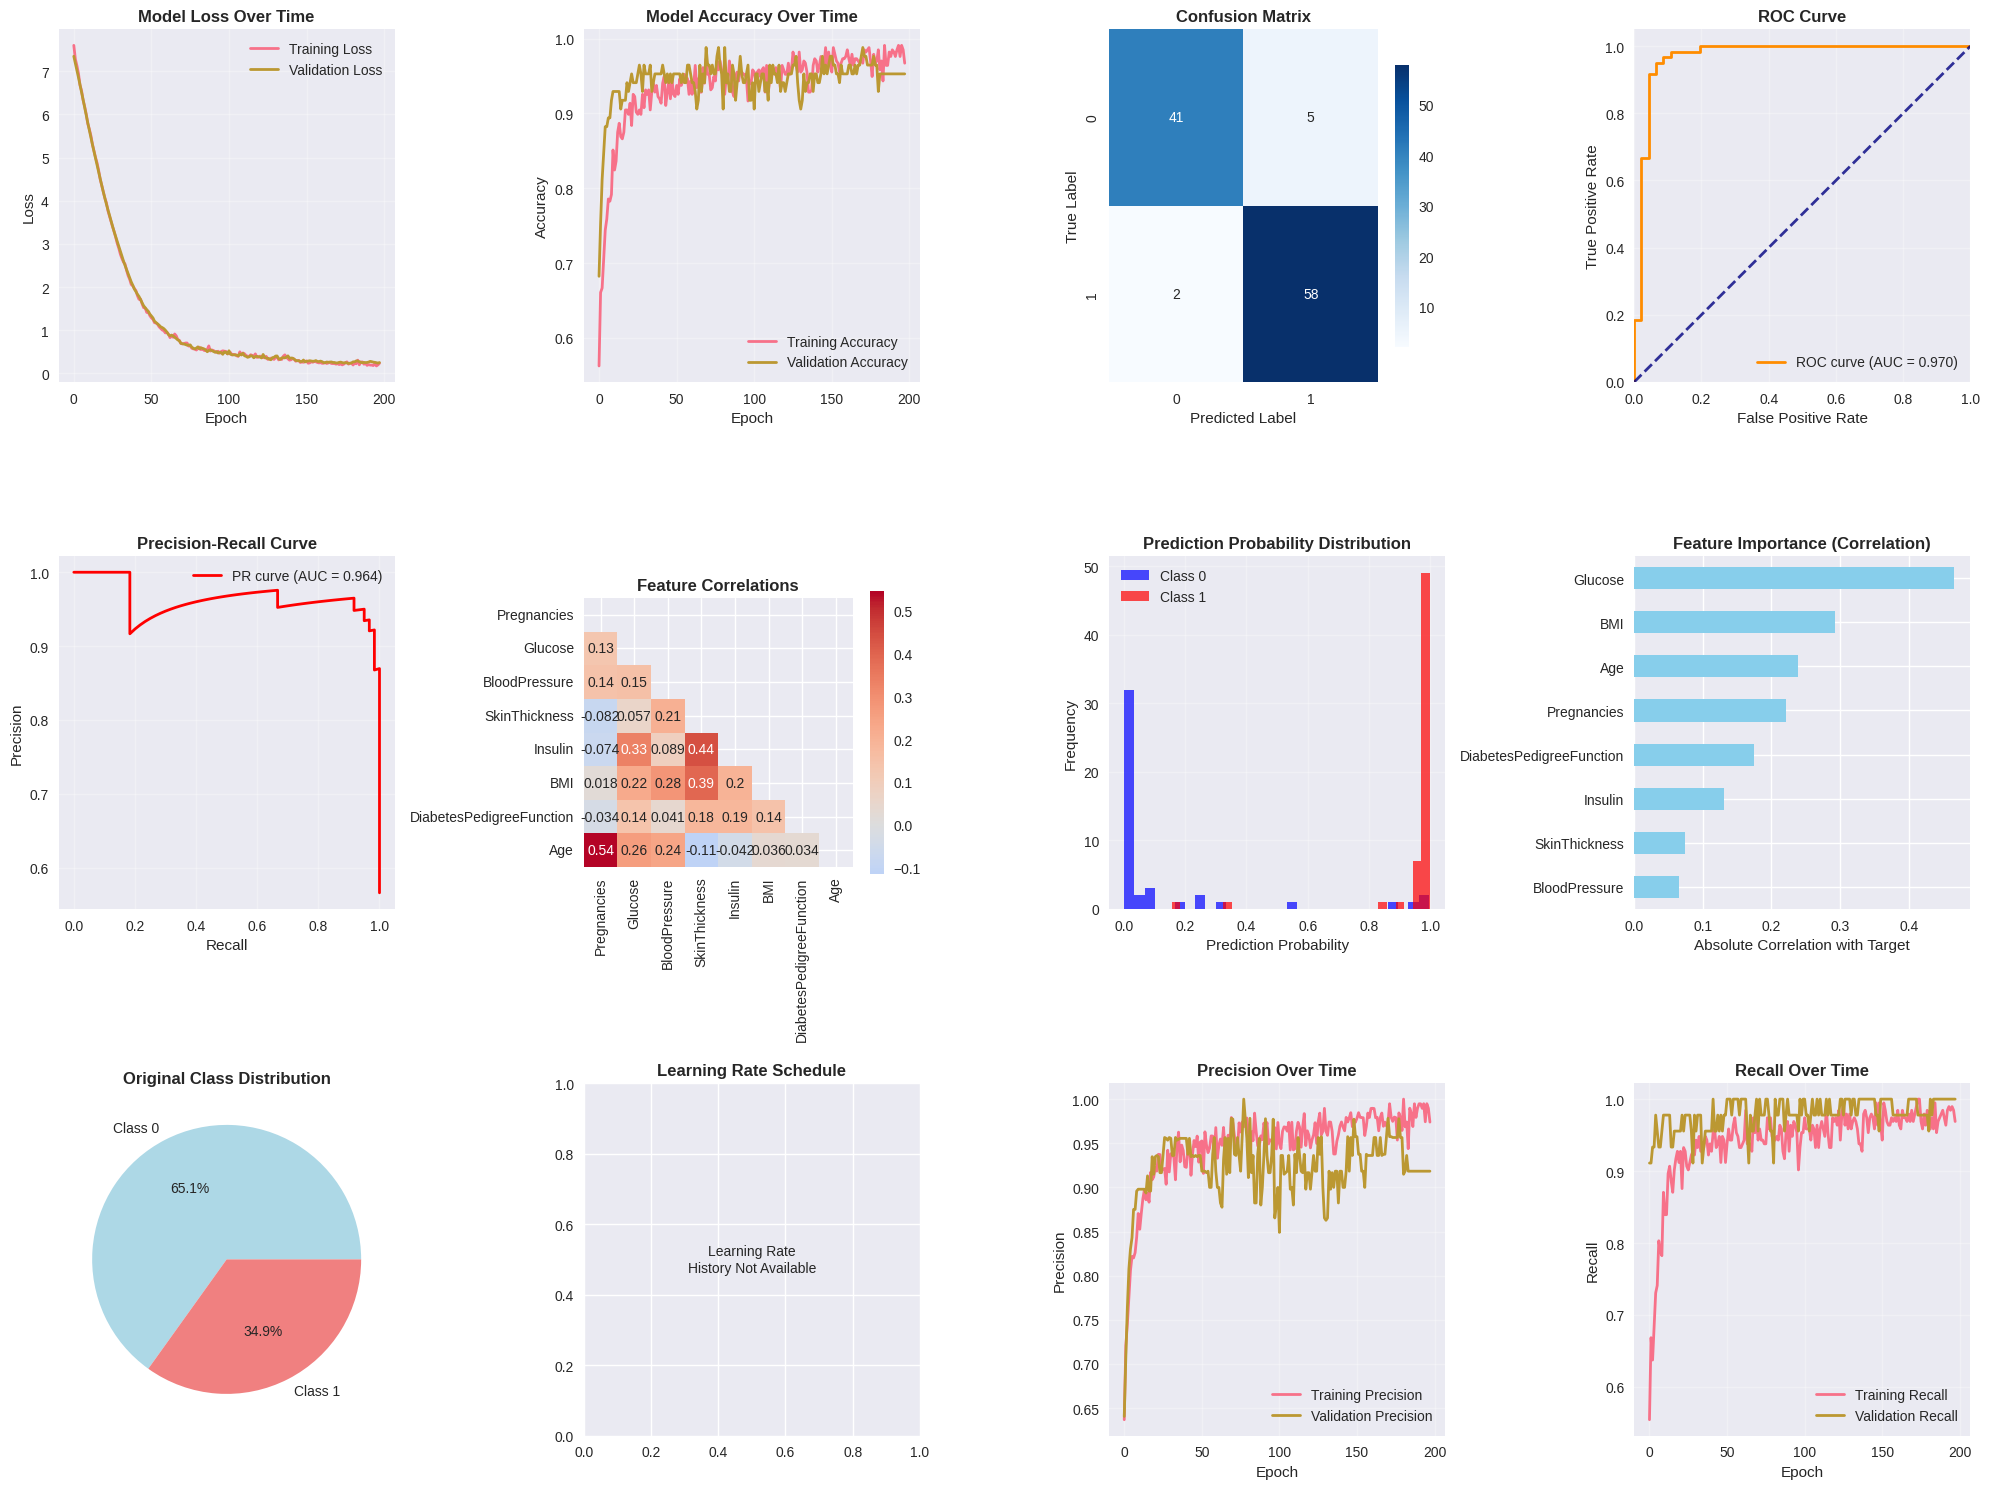


✅ Analysis complete!


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import (confusion_matrix, roc_curve, auc, classification_report,
                           precision_recall_curve, average_precision_score,
                           roc_auc_score, f1_score, precision_score, recall_score)
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, AlphaDropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from sklearn.utils.class_weight import compute_class_weight # Import compute_class_weight from sklearn.utils
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def load_and_explore_data():
    """Load data and perform initial exploration"""
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_csv(next(iter(uploaded)))

    print("=== Dataset Overview ===")
    print(f"Dataset shape: {df.shape}")
    print(f"\nTarget distribution:")
    print(df['Outcome'].value_counts())
    print(f"Imbalance ratio: {df['Outcome'].value_counts()[0] / df['Outcome'].value_counts()[1]:.2f}:1")

    # Check for missing values
    print(f"\nMissing values per column:")
    print(df.isnull().sum())

    # Basic statistics
    print(f"\nDataset info:")
    print(df.info())

    return df

def advanced_preprocessing(df):
    """Enhanced preprocessing with multiple strategies"""
    # Separate features and target
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']

    # Handle missing values with KNN imputer (more sophisticated)
    print("Handling missing values with KNN imputation...")
    imputer = KNNImputer(n_neighbors=5)
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Detect and handle outliers using IQR method
    print("Detecting outliers...")
    Q1 = X_imputed.quantile(0.25)
    Q3 = X_imputed.quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (X_imputed < (Q1 - 1.5 * IQR)) | (X_imputed > (Q3 + 1.5 * IQR))
    outlier_count = outlier_condition.sum().sum()
    print(f"Total outliers detected: {outlier_count}")

    return X_imputed, y

def handle_imbalance(X, y, strategy='smote_enn'):
    """Multiple strategies for handling imbalanced data"""
    print(f"Original class distribution: {np.bincount(y)}")

    if strategy == 'smote':
        sampler = SMOTE(sampling_strategy=0.8, random_state=42, k_neighbors=5)
    elif strategy == 'adasyn':
        sampler = ADASYN(sampling_strategy=0.8, random_state=42)
    elif strategy == 'borderline_smote':
        sampler = BorderlineSMOTE(sampling_strategy=0.8, random_state=42)
    elif strategy == 'smote_enn':
        sampler = SMOTEENN(random_state=42)
    else:
        return X, y

    X_resampled, y_resampled = sampler.fit_resample(X, y)
    print(f"After {strategy}: {np.bincount(y_resampled)}")

    return X_resampled, y_resampled

def build_enhanced_model(input_dim, class_weights=None):
    """Build an enhanced neural network with better architecture"""
    model = Sequential([
        # Input layer with higher capacity
        Dense(128, input_dim=input_dim, activation='relu',
              kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        BatchNormalization(),
        Dropout(0.3),

        # Hidden layers with decreasing size
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.005, l2=0.005)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.005, l2=0.005)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
        BatchNormalization(),
        Dropout(0.2),

        # Output layer
        Dense(1, activation='sigmoid')
    ])

    # Use a more conservative learning rate
    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy', 'precision', 'recall']
    )

    return model

def train_model_with_callbacks(model, X_train, y_train, class_weights):
    """Train model with enhanced callbacks"""
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-7,
            verbose=1
        ),
        ModelCheckpoint(
            'best_model.h5',
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ]

    history = model.fit(
        X_train, y_train,
        epochs=200,
        batch_size=32,
        validation_split=0.2,
        callbacks=callbacks,
        class_weight=class_weights,
        verbose=1
    )

    return history

def comprehensive_evaluation(model, X_test, y_test):
    """Comprehensive model evaluation with multiple metrics"""
    # Predictions
    y_pred_prob = model.predict(X_test).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate metrics
    metrics = {
        'accuracy': np.mean(y_pred == y_test),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc_roc': roc_auc_score(y_test, y_pred_prob),
        'auc_pr': average_precision_score(y_test, y_pred_prob)
    }

    print("=== Model Performance Metrics ===")
    for metric, value in metrics.items():
        print(f"{metric.upper()}: {value:.4f}")

    print("\n=== Detailed Classification Report ===")
    print(classification_report(y_test, y_pred))

    return y_pred_prob, y_pred, metrics

def create_enhanced_visualizations(history, y_test, y_pred_prob, y_pred, df):
    """Create comprehensive visualizations"""
    # Set up the plotting grid
    fig = plt.figure(figsize=(20, 15))

    # 1. Training History
    plt.subplot(3, 4, 1)
    plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title('Model Loss Over Time', fontsize=12, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(3, 4, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.title('Model Accuracy Over Time', fontsize=12, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 2. Confusion Matrix
    plt.subplot(3, 4, 3)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'shrink': .8})
    plt.title('Confusion Matrix', fontsize=12, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # 3. ROC Curve
    plt.subplot(3, 4, 4)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.8)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve', fontsize=12, fontweight='bold')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)

    # 4. Precision-Recall Curve
    plt.subplot(3, 4, 5)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = average_precision_score(y_test, y_pred_prob)
    plt.plot(recall, precision, color='red', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 5. Feature Correlation Heatmap
    plt.subplot(3, 4, 6)
    correlation_matrix = df.drop('Outcome', axis=1).corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, square=True, cbar_kws={'shrink': .8})
    plt.title('Feature Correlations', fontsize=12, fontweight='bold')

    # 6. Prediction Distribution
    plt.subplot(3, 4, 7)
    plt.hist(y_pred_prob[y_test == 0], bins=30, alpha=0.7, label='Class 0', color='blue')
    plt.hist(y_pred_prob[y_test == 1], bins=30, alpha=0.7, label='Class 1', color='red')
    plt.xlabel('Prediction Probability')
    plt.ylabel('Frequency')
    plt.title('Prediction Probability Distribution', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 7. Feature Importance (using correlation with target)
    plt.subplot(3, 4, 8)
    feature_importance = abs(df.corr()['Outcome'].drop('Outcome')).sort_values(ascending=True)
    feature_importance.plot(kind='barh', color='skyblue')
    plt.title('Feature Importance (Correlation)', fontsize=12, fontweight='bold')
    plt.xlabel('Absolute Correlation with Target')

    # 8. Class Distribution
    plt.subplot(3, 4, 9)
    class_counts = df['Outcome'].value_counts()
    plt.pie(class_counts.values, labels=['Class 0', 'Class 1'], autopct='%1.1f%%',
            colors=['lightblue', 'lightcoral'])
    plt.title('Original Class Distribution', fontsize=12, fontweight='bold')

    # 9. Learning Rate History (if available)
    plt.subplot(3, 4, 10)
    if 'lr' in history.history:
        plt.plot(history.history['lr'], linewidth=2, color='green')
        plt.title('Learning Rate Schedule', fontsize=12, fontweight='bold')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.yscale('log')
        plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, 'Learning Rate\nHistory Not Available',
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Learning Rate Schedule', fontsize=12, fontweight='bold')

    # 10. Precision/Recall over Training
    plt.subplot(3, 4, 11)
    if 'precision' in history.history:
        plt.plot(history.history['precision'], label='Training Precision', linewidth=2)
        plt.plot(history.history['val_precision'], label='Validation Precision', linewidth=2)
        plt.title('Precision Over Time', fontsize=12, fontweight='bold')
        plt.xlabel('Epoch')
        plt.ylabel('Precision')
        plt.legend()
        plt.grid(True, alpha=0.3)

    # 11. Recall over Training
    plt.subplot(3, 4, 12)
    if 'recall' in history.history:
        plt.plot(history.history['recall'], label='Training Recall', linewidth=2)
        plt.plot(history.history['val_recall'], label='Validation Recall', linewidth=2)
        plt.title('Recall Over Time', fontsize=12, fontweight='bold')
        plt.xlabel('Epoch')
        plt.ylabel('Recall')
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def cross_validation_analysis(X, y, cv_folds=5):
    """Perform cross-validation analysis"""
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC

    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'SVM': SVC(random_state=42, probability=True)
    }

    print("=== Cross-Validation Comparison ===")
    cv_results = {}

    for name, model in models.items():
        cv_scores = cross_val_score(model, X, y, cv=cv_folds, scoring='roc_auc')
        cv_results[name] = cv_scores
        print(f"{name}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    return cv_results

# Main execution
def main():
    print("🚀 Starting Enhanced Imbalanced Dataset Classification")
    print("=" * 60)

    # Load and explore data
    df = load_and_explore_data()

    # Advanced preprocessing
    X, y = advanced_preprocessing(df)

    # Handle class imbalance with multiple strategies
    X_resampled, y_resampled = handle_imbalance(X, y, strategy='smote_enn')

    # Split the data with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )

    # Scale features with RobustScaler (better for outliers)
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Calculate class weights for additional balance
    class_weights = compute_class_weight(
        'balanced', classes=np.unique(y_train), y=y_train
    )
    class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    print(f"Class weights: {class_weight_dict}")

    # Build and train model
    print("\n🏗️  Building enhanced neural network...")
    model = build_enhanced_model(X_train_scaled.shape[1])
    print(model.summary())

    print("\n🎯 Training model with advanced callbacks...")
    history = train_model_with_callbacks(model, X_train_scaled, y_train, class_weight_dict)

    # Comprehensive evaluation
    print("\n📊 Evaluating model performance...")
    y_pred_prob, y_pred, metrics = comprehensive_evaluation(model, X_test_scaled, y_test)

    # Cross-validation comparison
    print("\n🔄 Running cross-validation comparison...")
    cv_results = cross_validation_analysis(X_resampled, y_resampled)

    # Create visualizations
    print("\n📈 Creating comprehensive visualizations...")
    create_enhanced_visualizations(history, y_test, y_pred_prob, y_pred, df)

    print("\n✅ Analysis complete!")
    return model, scaler, metrics

# Run the enhanced analysis
if __name__ == "__main__":
    model, scaler, final_metrics = main()

🚀 Starting Federated Learning with SHAP Analysis


Saving diabetes.csv to diabetes (17).csv
Dataset loaded: (768, 9)
Class distribution: {0: 500, 1: 268}
Distributing data among 4 agents (non_iid)...
Agent 0: Preprocessing 153 samples
Agent 0: After preprocessing - Train: 139, Val: 35
Agent 0: 153 samples, Class distribution: [122  31]
Agent 1: Preprocessing 153 samples
Agent 1: After preprocessing - Train: 60, Val: 15
Agent 1: 153 samples, Class distribution: [91 62]
Agent 2: Preprocessing 153 samples
Agent 2: After preprocessing - Train: 72, Val: 18
Agent 2: 153 samples, Class distribution: [61 92]
Agent 3: Preprocessing 59 samples
Agent 3: After preprocessing - Train: 17, Val: 5
Agent 3: 59 samples, Class distribution: [30 29]

🚀 Starting Federated Learning with 4 agents for 10 rounds

📡 Federated Round 1/10
----------------------------------------
Agent 0: Starting local training...
Agent 0: Local training complete - AUC: 0.9367
Agent 1: Starting local training...
Agent 1: Local training complete - AUC: 1.0000
Agent 2: Starting loc

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━

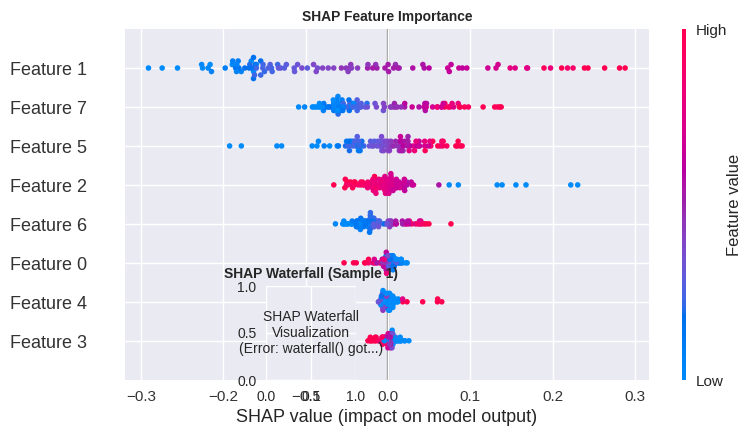


🎯 Creating Additional SHAP Visualizations...


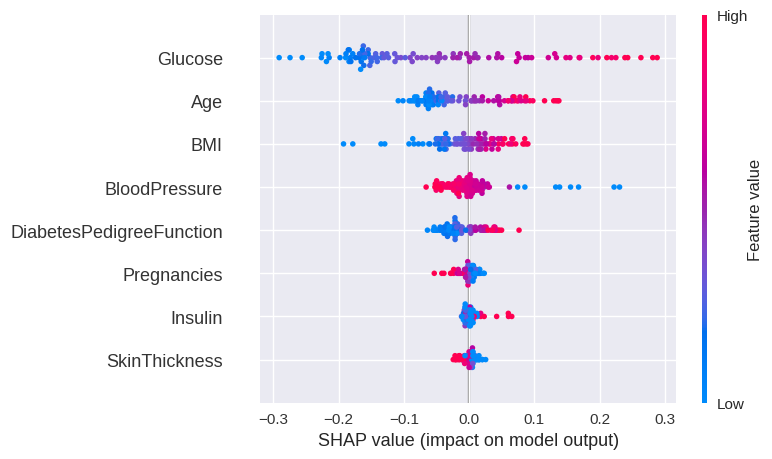

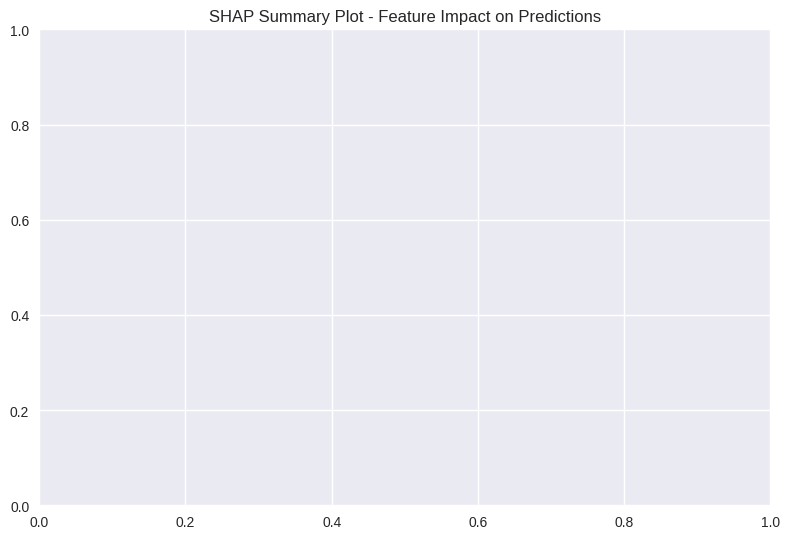

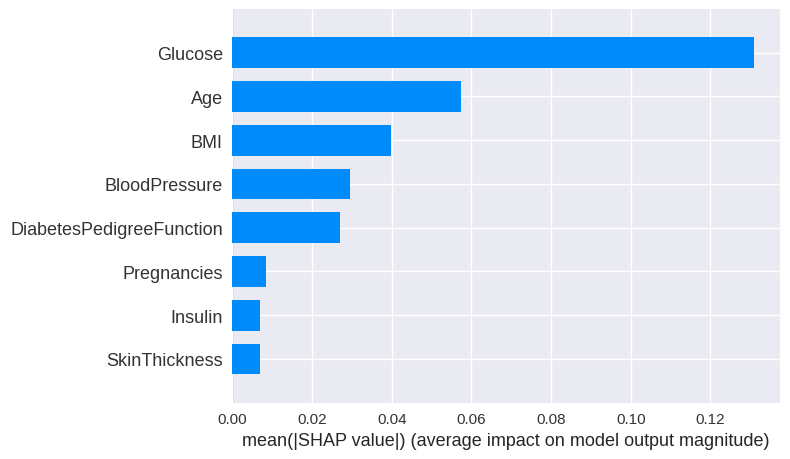

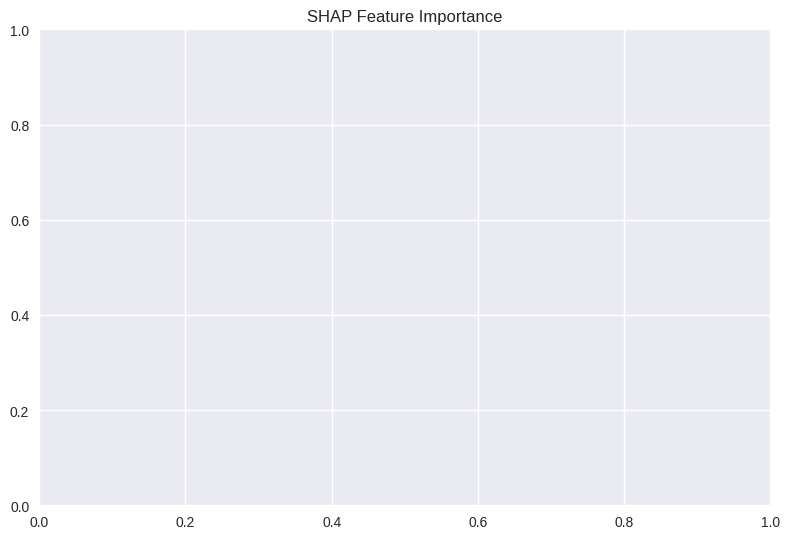


🏆 Agent Performance Summary:
--------------------------------------------------
Agent 0: AUC=0.9900, F1=0.9756, Precision=0.9524, Recall=1.0000
Agent 1: AUC=1.0000, F1=1.0000, Precision=1.0000, Recall=1.0000
Agent 2: AUC=1.0000, F1=0.6667, Precision=1.0000, Recall=0.5000
Agent 3: AUC=1.0000, F1=1.0000, Precision=1.0000, Recall=1.0000

🌐 Global Model: AUC=0.8154, F1=0.5895

✅ Federated Learning with SHAP Analysis Complete!


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (confusion_matrix, roc_curve, auc, classification_report,
                           precision_recall_curve, average_precision_score,
                           roc_auc_score, f1_score, precision_score, recall_score)
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from sklearn.utils import class_weight
import shap
import copy
import warnings
warnings.filterwarnings('ignore')

# Install SHAP if not available
try:
    import shap
except ImportError:
    print("Installing SHAP...")
    !pip install shap
    import shap

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class FederatedAgent:
    """Individual agent in federated learning system"""

    def __init__(self, agent_id, X_data, y_data):
        self.agent_id = agent_id
        self.X_data = X_data
        self.y_data = y_data
        self.model = None
        self.scaler = RobustScaler()
        self.history = None
        self.local_metrics = {}

    def preprocess_data(self):
        """Preprocess agent's local data"""
        print(f"Agent {self.agent_id}: Preprocessing {len(self.X_data)} samples")

        # Handle imbalance with SMOTE-ENN
        smote_enn = SMOTEENN(random_state=42)
        X_resampled, y_resampled = smote_enn.fit_resample(self.X_data, self.y_data)

        # Split data
        X_train, X_val, y_train, y_val = train_test_split(
            X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
        )

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_val_scaled = self.scaler.transform(X_val)

        self.X_train = X_train_scaled
        self.X_val = X_val_scaled
        self.y_train = y_train
        self.y_val = y_val

        # Calculate class weights
        class_weights = class_weight.compute_class_weight(
            'balanced', classes=np.unique(y_train), y=y_train
        )
        self.class_weights = {i: class_weights[i] for i in range(len(class_weights))}

        print(f"Agent {self.agent_id}: After preprocessing - Train: {len(X_train_scaled)}, Val: {len(X_val_scaled)}")

    def build_model(self, input_dim):
        """Build local model architecture"""
        self.model = Sequential([
            Dense(128, input_dim=input_dim, activation='relu',
                  kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
            BatchNormalization(),
            Dropout(0.3),

            Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.005, l2=0.005)),
            BatchNormalization(),
            Dropout(0.4),

            Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.005, l2=0.005)),
            BatchNormalization(),
            Dropout(0.3),

            Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
            BatchNormalization(),
            Dropout(0.2),

            Dense(1, activation='sigmoid')
        ])

        optimizer = Adam(learning_rate=0.001)
        self.model.compile(
            loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy', 'precision', 'recall']
        )

    def local_train(self, epochs=50):
        """Train model on local data"""
        callbacks = [
            EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-7)
        ]

        print(f"Agent {self.agent_id}: Starting local training...")
        self.history = self.model.fit(
            self.X_train, self.y_train,
            epochs=epochs,
            batch_size=32,
            validation_data=(self.X_val, self.y_val),
            callbacks=callbacks,
            class_weight=self.class_weights,
            verbose=0
        )

        # Calculate local metrics
        y_pred_prob = self.model.predict(self.X_val, verbose=0).flatten()
        y_pred = (y_pred_prob > 0.5).astype(int)

        self.local_metrics = {
            'accuracy': np.mean(y_pred == self.y_val),
            'precision': precision_score(self.y_val, y_pred),
            'recall': recall_score(self.y_val, y_pred),
            'f1': f1_score(self.y_val, y_pred),
            'auc_roc': roc_auc_score(self.y_val, y_pred_prob)
        }

        print(f"Agent {self.agent_id}: Local training complete - AUC: {self.local_metrics['auc_roc']:.4f}")

    def get_weights(self):
        """Get model weights for federated averaging"""
        return self.model.get_weights()

    def set_weights(self, weights):
        """Set model weights from federated averaging"""
        self.model.set_weights(weights)

class FederatedLearningCoordinator:
    """Coordinates federated learning across multiple agents"""

    def __init__(self, num_agents=4):
        self.num_agents = num_agents
        self.agents = []
        self.global_model = None
        self.global_history = {
            'round': [], 'avg_accuracy': [], 'avg_precision': [],
            'avg_recall': [], 'avg_f1': [], 'avg_auc': []
        }

    def distribute_data(self, X, y, distribution='iid'):
        """Distribute data among agents"""
        print(f"Distributing data among {self.num_agents} agents ({distribution})...")

        if distribution == 'iid':
            # Independent and identically distributed
            indices = np.random.permutation(len(X))
            split_indices = np.array_split(indices, self.num_agents)

        elif distribution == 'non_iid':
            # Non-IID: Each agent gets different class distributions
            class_0_indices = np.where(y == 0)[0]
            class_1_indices = np.where(y == 1)[0]

            # Create different class ratios for each agent
            ratios = [0.8, 0.6, 0.4, 0.2]  # Agent 0 has more class 0, Agent 3 has more class 1
            split_indices = []

            for i, ratio in enumerate(ratios):
                n_samples = len(X) // self.num_agents
                n_class_0 = int(n_samples * ratio)
                n_class_1 = n_samples - n_class_0

                agent_class_0 = np.random.choice(class_0_indices,
                                                min(n_class_0, len(class_0_indices)),
                                                replace=False)
                agent_class_1 = np.random.choice(class_1_indices,
                                                min(n_class_1, len(class_1_indices)),
                                                replace=False)

                agent_indices = np.concatenate([agent_class_0, agent_class_1])
                split_indices.append(agent_indices)

                # Remove used indices
                class_0_indices = np.setdiff1d(class_0_indices, agent_class_0)
                class_1_indices = np.setdiff1d(class_1_indices, agent_class_1)

        # Create agents with their data
        for i, indices in enumerate(split_indices):
            X_agent = X.iloc[indices] if hasattr(X, 'iloc') else X[indices]
            y_agent = y.iloc[indices] if hasattr(y, 'iloc') else y[indices]

            agent = FederatedAgent(i, X_agent, y_agent)
            agent.preprocess_data()
            self.agents.append(agent)

            print(f"Agent {i}: {len(indices)} samples, Class distribution: {np.bincount(y_agent)}")

    def initialize_global_model(self, input_dim):
        """Initialize global model architecture"""
        self.global_model = Sequential([
            Dense(128, input_dim=input_dim, activation='relu',
                  kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
            BatchNormalization(),
            Dropout(0.3),

            Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.005, l2=0.005)),
            BatchNormalization(),
            Dropout(0.4),

            Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.005, l2=0.005)),
            BatchNormalization(),
            Dropout(0.3),

            Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
            BatchNormalization(),
            Dropout(0.2),

            Dense(1, activation='sigmoid')
        ])

        optimizer = Adam(learning_rate=0.001)
        self.global_model.compile(
            loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy', 'precision', 'recall']
        )

        # Initialize all agent models with same architecture
        for agent in self.agents:
            agent.build_model(input_dim)

    def federated_averaging(self):
        """Perform federated averaging of model weights"""
        # Get weights from all agents
        agent_weights = [agent.get_weights() for agent in self.agents]

        # Calculate average weights
        avg_weights = []
        for layer_idx in range(len(agent_weights[0])):
            layer_weights = [agent_weights[agent_idx][layer_idx]
                           for agent_idx in range(len(agent_weights))]
            avg_layer_weights = np.mean(layer_weights, axis=0)
            avg_weights.append(avg_layer_weights)

        # Update global model and all agents
        self.global_model.set_weights(avg_weights)
        for agent in self.agents:
            agent.set_weights(avg_weights)

        return avg_weights

    def train_federated(self, rounds=10, local_epochs=20):
        """Execute federated learning training"""
        print(f"\n🚀 Starting Federated Learning with {self.num_agents} agents for {rounds} rounds")
        print("=" * 80)

        for round_num in range(rounds):
            print(f"\n📡 Federated Round {round_num + 1}/{rounds}")
            print("-" * 40)

            # Local training for each agent
            for agent in self.agents:
                agent.local_train(epochs=local_epochs)

            # Federated averaging
            self.federated_averaging()

            # Calculate global metrics
            avg_metrics = {
                'accuracy': np.mean([agent.local_metrics['accuracy'] for agent in self.agents]),
                'precision': np.mean([agent.local_metrics['precision'] for agent in self.agents]),
                'recall': np.mean([agent.local_metrics['recall'] for agent in self.agents]),
                'f1': np.mean([agent.local_metrics['f1'] for agent in self.agents]),
                'auc_roc': np.mean([agent.local_metrics['auc_roc'] for agent in self.agents])
            }

            # Store history
            self.global_history['round'].append(round_num + 1)
            self.global_history['avg_accuracy'].append(avg_metrics['accuracy'])
            self.global_history['avg_precision'].append(avg_metrics['precision'])
            self.global_history['avg_recall'].append(avg_metrics['recall'])
            self.global_history['avg_f1'].append(avg_metrics['f1'])
            self.global_history['avg_auc'].append(avg_metrics['auc_roc'])

            print(f"Global Metrics - Accuracy: {avg_metrics['accuracy']:.4f}, "
                  f"Precision: {avg_metrics['precision']:.4f}, "
                  f"Recall: {avg_metrics['recall']:.4f}, "
                  f"F1: {avg_metrics['f1']:.4f}, "
                  f"AUC: {avg_metrics['auc_roc']:.4f}")

def apply_shap_analysis(model, X_test, X_train_sample, feature_names):
    """Apply SHAP analysis for model interpretability"""
    print("\n🔍 Applying SHAP Analysis for Model Interpretability...")

    # Create SHAP explainer
    explainer = shap.KernelExplainer(
        lambda x: model.predict(x).flatten(),
        X_train_sample
    )

    # Calculate SHAP values for test set (sample for efficiency)
    sample_size = min(100, len(X_test))
    X_test_sample = X_test[:sample_size]

    print(f"Calculating SHAP values for {sample_size} test samples...")
    shap_values = explainer.shap_values(X_test_sample, nsamples=100)

    return explainer, shap_values, X_test_sample

def create_federated_visualizations(coordinator, global_test_results, shap_data=None):
    """Create comprehensive visualizations for federated learning"""
    fig = plt.figure(figsize=(24, 18))

    # 1. Federated Learning Progress
    plt.subplot(3, 5, 1)
    rounds = coordinator.global_history['round']
    plt.plot(rounds, coordinator.global_history['avg_accuracy'], 'o-', label='Accuracy', linewidth=2)
    plt.plot(rounds, coordinator.global_history['avg_f1'], 'o-', label='F1-Score', linewidth=2)
    plt.plot(rounds, coordinator.global_history['avg_auc'], 'o-', label='AUC-ROC', linewidth=2)
    plt.title('Federated Learning Progress', fontsize=12, fontweight='bold')
    plt.xlabel('Round')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 2. Agent Performance Comparison
    plt.subplot(3, 5, 2)
    agent_aucs = [agent.local_metrics['auc_roc'] for agent in coordinator.agents]
    agent_f1s = [agent.local_metrics['f1'] for agent in coordinator.agents]

    x = np.arange(len(coordinator.agents))
    width = 0.35
    plt.bar(x - width/2, agent_aucs, width, label='AUC-ROC', alpha=0.8)
    plt.bar(x + width/2, agent_f1s, width, label='F1-Score', alpha=0.8)
    plt.xlabel('Agent ID')
    plt.ylabel('Score')
    plt.title('Final Agent Performance', fontsize=12, fontweight='bold')
    plt.xticks(x, [f'Agent {i}' for i in range(len(coordinator.agents))])
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 3. Global Model Confusion Matrix
    plt.subplot(3, 5, 3)
    cm = confusion_matrix(global_test_results['y_true'], global_test_results['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'shrink': .8})
    plt.title('Global Model Confusion Matrix', fontsize=12, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # 4. Global Model ROC Curve
    plt.subplot(3, 5, 4)
    fpr, tpr, _ = roc_curve(global_test_results['y_true'], global_test_results['y_pred_prob'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.8)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Global Model ROC Curve', fontsize=12, fontweight='bold')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)

    # 5. Precision-Recall Curve
    plt.subplot(3, 5, 5)
    precision, recall, _ = precision_recall_curve(global_test_results['y_true'],
                                                 global_test_results['y_pred_prob'])
    pr_auc = average_precision_score(global_test_results['y_true'],
                                   global_test_results['y_pred_prob'])
    plt.plot(recall, precision, color='red', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 6-10: Agent-specific training curves
    for i, agent in enumerate(coordinator.agents[:4]):
        plt.subplot(3, 5, 6 + i)
        if agent.history:
            plt.plot(agent.history.history['loss'], label='Training Loss', alpha=0.8)
            plt.plot(agent.history.history['val_loss'], label='Validation Loss', alpha=0.8)
            plt.title(f'Agent {i} Training Loss', fontsize=10, fontweight='bold')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True, alpha=0.3)

    # 11-15: SHAP visualizations (if available)
    if shap_data:
        explainer, shap_values, X_test_sample = shap_data

        # SHAP Summary plot
        plt.subplot(3, 5, 11)
        try:
            shap.summary_plot(shap_values, X_test_sample,
                             feature_names=None, show=False, max_display=10)
            plt.title('SHAP Feature Importance', fontsize=10, fontweight='bold')
        except Exception as e:
            plt.text(0.5, 0.5, f'SHAP Summary\nPlot\n(Error: {str(e)[:20]}...)',
                    ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('SHAP Feature Importance', fontsize=10, fontweight='bold')

        # SHAP Waterfall plot for first prediction
        plt.subplot(3, 5, 12)
        try:
            if hasattr(explainer, 'expected_value') and len(shap_values) > 0:
                expected_val = explainer.expected_value[0] if isinstance(explainer.expected_value, np.ndarray) else explainer.expected_value
                shap.waterfall_plot(expected_val, shap_values[0],
                                  X_test_sample[0], show=False, max_display=8)
                plt.title('SHAP Waterfall (Sample 1)', fontsize=10, fontweight='bold')
            else:
                raise Exception("SHAP data not available")
        except Exception as e:
            plt.text(0.5, 0.5, f'SHAP Waterfall\nVisualization\n(Error: {str(e)[:15]}...)',
                    ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('SHAP Waterfall (Sample 1)', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

def main():
    """Main execution function"""
    # Install required packages if not available
    try:
        import shap
    except ImportError:
        print("Installing SHAP...")
        import subprocess
        import sys
        subprocess.check_call([sys.executable, "-m", "pip", "install", "shap"])
        import shap

    print("🚀 Starting Federated Learning with SHAP Analysis")
    print("=" * 80)

    # Load data
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_csv(next(iter(uploaded)))

    print(f"Dataset loaded: {df.shape}")
    print(f"Class distribution: {df['Outcome'].value_counts().to_dict()}")

    # Preprocess data
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']

    # Handle missing values
    imputer = KNNImputer(n_neighbors=5)
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Split for global test set (keep separate from federated training)
    X_fed, X_test_global, y_fed, y_test_global = train_test_split(
        X_imputed, y, test_size=0.2, random_state=42, stratify=y
    )

    # Initialize federated learning coordinator
    coordinator = FederatedLearningCoordinator(num_agents=4)

    # Distribute data among agents (try both IID and non-IID)
    coordinator.distribute_data(X_fed, y_fed, distribution='non_iid')

    # Initialize global model
    coordinator.initialize_global_model(input_dim=X_fed.shape[1])

    # Train federated model
    coordinator.train_federated(rounds=10, local_epochs=15)

    # Evaluate global model on test set
    print("\n📊 Evaluating Global Model on Test Set...")

    # Scale test data using first agent's scaler (could be improved)
    X_test_scaled = coordinator.agents[0].scaler.transform(X_test_global)

    # Global model predictions
    y_pred_prob_global = coordinator.global_model.predict(X_test_scaled, verbose=0).flatten()
    y_pred_global = (y_pred_prob_global > 0.5).astype(int)

    # Calculate global metrics
    global_metrics = {
        'accuracy': np.mean(y_pred_global == y_test_global),
        'precision': precision_score(y_test_global, y_pred_global),
        'recall': recall_score(y_test_global, y_pred_global),
        'f1': f1_score(y_test_global, y_pred_global),
        'auc_roc': roc_auc_score(y_test_global, y_pred_prob_global),
        'auc_pr': average_precision_score(y_test_global, y_pred_prob_global)
    }

    print("=== Global Model Performance ===")
    for metric, value in global_metrics.items():
        print(f"{metric.upper()}: {value:.4f}")

    print("\n=== Detailed Classification Report ===")
    print(classification_report(y_test_global, y_pred_global))

    # Prepare test results for visualization
    global_test_results = {
        'y_true': y_test_global,
        'y_pred': y_pred_global,
        'y_pred_prob': y_pred_prob_global
    }

    # SHAP Analysis
    try:
        # Use a sample of training data for SHAP baseline
        train_sample_size = min(100, len(coordinator.agents[0].X_train))
        X_train_sample = coordinator.agents[0].X_train[:train_sample_size]

        shap_data = apply_shap_analysis(
            coordinator.global_model,
            X_test_scaled,
            X_train_sample,
            X.columns.tolist()
        )

        print("✅ SHAP analysis completed successfully!")

    except Exception as e:
        print(f"⚠️  SHAP analysis failed: {str(e)}")
        shap_data = None

    # Create comprehensive visualizations
    print("\n📈 Creating Federated Learning Visualizations...")
    create_federated_visualizations(coordinator, global_test_results, shap_data)

    # Additional SHAP plots if available
    if shap_data:
        explainer, shap_values, X_test_sample = shap_data

        print("\n🎯 Creating Additional SHAP Visualizations...")

        try:
            # Summary plot
            plt.figure(figsize=(12, 8))
            shap.summary_plot(shap_values, X_test_sample, feature_names=X.columns.tolist())
            plt.title('SHAP Summary Plot - Feature Impact on Predictions')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Could not create SHAP summary plot: {e}")

        try:
            # Feature importance
            plt.figure(figsize=(10, 6))
            shap.summary_plot(shap_values, X_test_sample, plot_type="bar",
                             feature_names=X.columns.tolist())
            plt.title('SHAP Feature Importance')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Could not create SHAP feature importance plot: {e}")

            # Alternative feature importance using mean absolute SHAP values
            plt.figure(figsize=(10, 6))
            if isinstance(shap_values, np.ndarray) and len(shap_values.shape) > 1:
                feature_importance = np.mean(np.abs(shap_values), axis=0)
                feature_names = X.columns.tolist() if len(X.columns) == len(feature_importance) else [f'Feature_{i}' for i in range(len(feature_importance))]

                # Create bar plot
                plt.barh(range(len(feature_importance)), feature_importance)
                plt.yticks(range(len(feature_importance)), feature_names)
                plt.xlabel('Mean |SHAP Value|')
                plt.title('Feature Importance (Alternative)')
                plt.tight_layout()
                plt.show()

    # Agent comparison analysis
    print("\n🏆 Agent Performance Summary:")
    print("-" * 50)
    for i, agent in enumerate(coordinator.agents):
        metrics = agent.local_metrics
        print(f"Agent {i}: AUC={metrics['auc_roc']:.4f}, "
              f"F1={metrics['f1']:.4f}, "
              f"Precision={metrics['precision']:.4f}, "
              f"Recall={metrics['recall']:.4f}")

    print(f"\n🌐 Global Model: AUC={global_metrics['auc_roc']:.4f}, "
          f"F1={global_metrics['f1']:.4f}")

    print("\n✅ Federated Learning with SHAP Analysis Complete!")

    return coordinator, global_metrics, shap_data

# Run the federated learning system
if __name__ == "__main__":
    coordinator, final_metrics, shap_results = main()

🚀 Starting Improved Federated Learning Analysis
Dataset created: (1000, 8)
Class distribution: [497 503]

🔄 Training Centralized Model for Comparison...

=== Centralized Model Performance ===
ACCURACY: 0.9450
PRECISION: 0.9787
RECALL: 0.9109
F1: 0.9436
AUC_ROC: 0.9820
Distributing data among 4 agents (balanced)...
Agent 0: Preprocessing 201 samples
Agent 0: After preprocessing - Train: 151, Val: 50
Agent 0: 201 samples, Class distribution: [100 101]
Agent 1: Preprocessing 201 samples
Agent 1: After preprocessing - Train: 151, Val: 50
Agent 1: 201 samples, Class distribution: [100 101]
Agent 2: Preprocessing 199 samples
Agent 2: After preprocessing - Train: 149, Val: 50
Agent 2: 199 samples, Class distribution: [ 99 100]
Agent 3: Preprocessing 199 samples
Agent 3: After preprocessing - Train: 149, Val: 50
Agent 3: 199 samples, Class distribution: [ 99 100]

🚀 Starting Improved Federated Learning with 4 agents for 15 rounds

📡 Federated Round 1/15
----------------------------------------

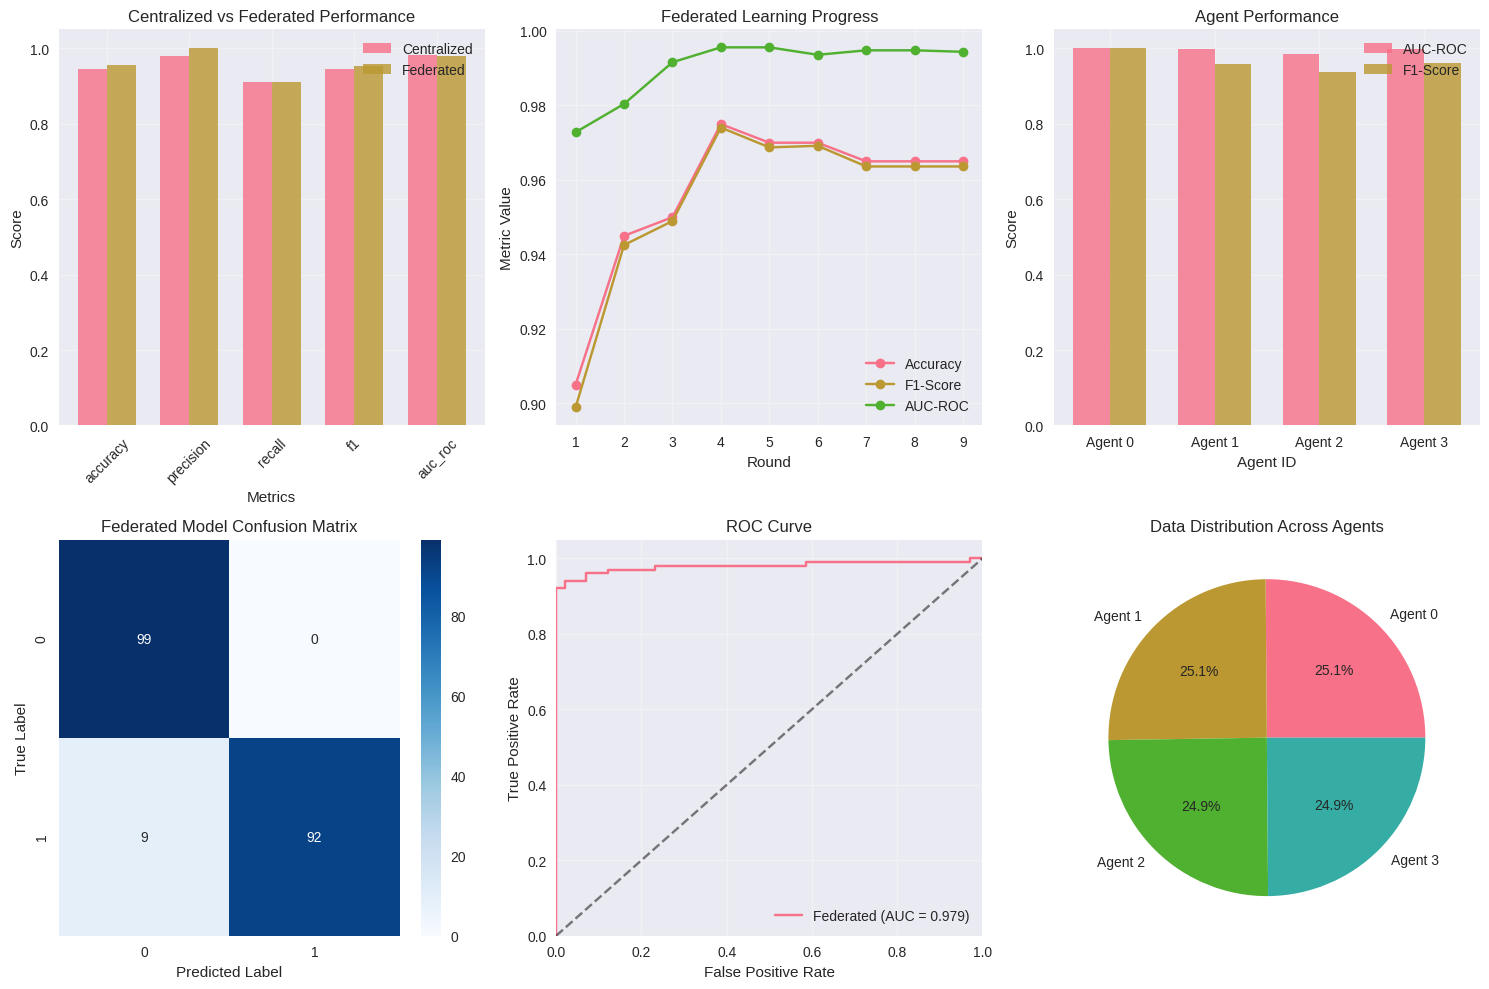


✅ Improved Federated Learning Analysis Complete!


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (confusion_matrix, roc_curve, auc, classification_report,
                           precision_recall_curve, average_precision_score,
                           roc_auc_score, f1_score, precision_score, recall_score)
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from sklearn.utils import class_weight
import copy
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class FederatedAgent:
    """Individual agent in federated learning system"""

    def __init__(self, agent_id, X_data, y_data, global_scaler=None):
        self.agent_id = agent_id
        self.X_data = X_data
        self.y_data = y_data
        self.model = None
        # Use global scaler for consistency across agents
        self.scaler = global_scaler if global_scaler is not None else RobustScaler()
        self.history = None
        self.local_metrics = {}
        self.data_size = len(X_data)  # For weighted averaging

    def preprocess_data(self, apply_smote=True):
        """Preprocess agent's local data with improved handling"""
        print(f"Agent {self.agent_id}: Preprocessing {len(self.X_data)} samples")

        # Only apply SMOTE if we have enough samples and severe imbalance
        if apply_smote and len(self.X_data) > 100:
            class_counts = np.bincount(self.y_data)
            imbalance_ratio = min(class_counts) / max(class_counts)

            if imbalance_ratio < 0.3:  # Only if severely imbalanced
                smote = SMOTE(random_state=42, k_neighbors=min(3, min(class_counts)-1))
                X_resampled, y_resampled = smote.fit_resample(self.X_data, self.y_data)
                print(f"Agent {self.agent_id}: Applied SMOTE - {len(self.X_data)} -> {len(X_resampled)} samples")
            else:
                X_resampled, y_resampled = self.X_data, self.y_data
        else:
            X_resampled, y_resampled = self.X_data, self.y_data

        # Split data with larger validation set for better evaluation
        test_size = min(0.3, max(0.15, 50/len(X_resampled)))  # Adaptive test size
        X_train, X_val, y_train, y_val = train_test_split(
            X_resampled, y_resampled, test_size=test_size, random_state=42,
            stratify=y_resampled if len(np.unique(y_resampled)) > 1 else None
        )

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_val_scaled = self.scaler.transform(X_val)

        self.X_train = X_train_scaled
        self.X_val = X_val_scaled
        self.y_train = y_train
        self.y_val = y_val

        # Calculate class weights more conservatively
        if len(np.unique(y_train)) > 1:
            class_weights = class_weight.compute_class_weight(
                'balanced', classes=np.unique(y_train), y=y_train
            )
            # Reduce extreme class weights
            max_weight = 3.0
            class_weights = np.clip(class_weights, 0.5, max_weight)
            self.class_weights = {i: class_weights[i] for i in range(len(class_weights))}
        else:
            self.class_weights = None

        print(f"Agent {self.agent_id}: After preprocessing - Train: {len(X_train_scaled)}, Val: {len(X_val_scaled)}")

    def build_model(self, input_dim):
        """Build improved model architecture"""
        # Smaller, less complex model to prevent overfitting
        self.model = Sequential([
            Dense(64, input_dim=input_dim, activation='relu',
                  kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
            BatchNormalization(),
            Dropout(0.3),

            Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
            BatchNormalization(),
            Dropout(0.3),

            Dense(16, activation='relu'),
            Dropout(0.2),

            Dense(1, activation='sigmoid')
        ])

        # Use adaptive learning rate
        optimizer = Adam(learning_rate=0.001, decay=1e-6)
        self.model.compile(
            loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy', 'precision', 'recall']
        )

    def local_train(self, epochs=30, min_epochs=10):
        """Improved local training with better early stopping"""
        callbacks = [
            EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True,
                         min_delta=0.001, verbose=0),
            ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=5,
                             min_lr=1e-6, verbose=0)
        ]

        print(f"Agent {self.agent_id}: Starting local training...")

        # Adjust batch size based on data size
        batch_size = min(32, max(8, len(self.X_train) // 10))

        self.history = self.model.fit(
            self.X_train, self.y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(self.X_val, self.y_val),
            callbacks=callbacks,
            class_weight=self.class_weights,
            verbose=0
        )

        # Calculate local metrics
        y_pred_prob = self.model.predict(self.X_val, verbose=0).flatten()
        y_pred = (y_pred_prob > 0.5).astype(int)

        self.local_metrics = {
            'accuracy': np.mean(y_pred == self.y_val),
            'precision': precision_score(self.y_val, y_pred, zero_division=0),
            'recall': recall_score(self.y_val, y_pred, zero_division=0),
            'f1': f1_score(self.y_val, y_pred, zero_division=0),
            'auc_roc': roc_auc_score(self.y_val, y_pred_prob) if len(np.unique(self.y_val)) > 1 else 0.5
        }

        print(f"Agent {self.agent_id}: Local training complete - AUC: {self.local_metrics['auc_roc']:.4f}")

    def get_weights(self):
        """Get model weights for federated averaging"""
        return self.model.get_weights()

    def set_weights(self, weights):
        """Set model weights from federated averaging"""
        self.model.set_weights(weights)

class FederatedLearningCoordinator:
    """Improved federated learning coordinator"""

    def __init__(self, num_agents=4):
        self.num_agents = num_agents
        self.agents = []
        self.global_model = None
        self.global_scaler = RobustScaler()  # Global scaler for consistency
        self.global_history = {
            'round': [], 'avg_accuracy': [], 'avg_precision': [],
            'avg_recall': [], 'avg_f1': [], 'avg_auc': []
        }

    def distribute_data(self, X, y, distribution='balanced'):
        """Improved data distribution with better balance"""
        print(f"Distributing data among {self.num_agents} agents ({distribution})...")

        # Fit global scaler on full dataset
        self.global_scaler.fit(X)

        if distribution == 'balanced':
            # Improved balanced distribution
            # Ensure each agent gets both classes
            class_0_indices = np.where(y == 0)[0]
            class_1_indices = np.where(y == 1)[0]

            # Shuffle indices
            np.random.shuffle(class_0_indices)
            np.random.shuffle(class_1_indices)

            # Distribute roughly equally
            class_0_splits = np.array_split(class_0_indices, self.num_agents)
            class_1_splits = np.array_split(class_1_indices, self.num_agents)

            split_indices = []
            for i in range(self.num_agents):
                agent_indices = np.concatenate([class_0_splits[i], class_1_splits[i]])
                np.random.shuffle(agent_indices)
                split_indices.append(agent_indices)

        elif distribution == 'iid':
            # Improved IID distribution
            indices = np.random.permutation(len(X))
            split_indices = np.array_split(indices, self.num_agents)

        elif distribution == 'non_iid':
            # Moderate non-IID (less extreme than original)
            class_0_indices = np.where(y == 0)[0]
            class_1_indices = np.where(y == 1)[0]

            # Less extreme ratios for better performance
            ratios = [0.7, 0.6, 0.4, 0.3]  # Less extreme imbalance
            split_indices = []

            for i, ratio in enumerate(ratios):
                n_samples = len(X) // self.num_agents
                n_class_0 = int(n_samples * ratio)
                n_class_1 = n_samples - n_class_0

                # Ensure minimum samples per class
                n_class_0 = max(10, min(n_class_0, len(class_0_indices)))
                n_class_1 = max(10, min(n_class_1, len(class_1_indices)))

                agent_class_0 = np.random.choice(class_0_indices,
                                                min(n_class_0, len(class_0_indices)),
                                                replace=False)
                agent_class_1 = np.random.choice(class_1_indices,
                                                min(n_class_1, len(class_1_indices)),
                                                replace=False)

                agent_indices = np.concatenate([agent_class_0, agent_class_1])
                split_indices.append(agent_indices)

                # Remove used indices
                class_0_indices = np.setdiff1d(class_0_indices, agent_class_0)
                class_1_indices = np.setdiff1d(class_1_indices, agent_class_1)

        # Create agents with their data
        for i, indices in enumerate(split_indices):
            X_agent = X.iloc[indices] if hasattr(X, 'iloc') else X[indices]
            y_agent = y.iloc[indices] if hasattr(y, 'iloc') else y[indices]

            # Use global scaler
            agent = FederatedAgent(i, X_agent, y_agent, copy.deepcopy(self.global_scaler))
            agent.preprocess_data(apply_smote=(len(indices) > 50))  # Only SMOTE for larger datasets
            self.agents.append(agent)

            class_dist = np.bincount(y_agent)
            print(f"Agent {i}: {len(indices)} samples, Class distribution: {class_dist}")

    def initialize_global_model(self, input_dim):
        """Initialize global model with same architecture as agents"""
        # Use same architecture as agents
        self.global_model = Sequential([
            Dense(64, input_dim=input_dim, activation='relu',
                  kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
            BatchNormalization(),
            Dropout(0.3),

            Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
            BatchNormalization(),
            Dropout(0.3),

            Dense(16, activation='relu'),
            Dropout(0.2),

            Dense(1, activation='sigmoid')
        ])

        optimizer = Adam(learning_rate=0.001, decay=1e-6)
        self.global_model.compile(
            loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy', 'precision', 'recall']
        )

        # Initialize all agent models
        for agent in self.agents:
            agent.build_model(input_dim)

    def weighted_federated_averaging(self):
        """Weighted federated averaging based on data size"""
        agent_weights = [agent.get_weights() for agent in self.agents]
        data_sizes = [agent.data_size for agent in self.agents]
        total_size = sum(data_sizes)

        # Calculate weighted average
        avg_weights = []
        for layer_idx in range(len(agent_weights[0])):
            weighted_layer = np.zeros_like(agent_weights[0][layer_idx])
            for agent_idx, weight in enumerate(data_sizes):
                contribution = (weight / total_size) * agent_weights[agent_idx][layer_idx]
                weighted_layer += contribution
            avg_weights.append(weighted_layer)

        # Update global model and all agents
        self.global_model.set_weights(avg_weights)
        for agent in self.agents:
            agent.set_weights(avg_weights)

        return avg_weights

    def train_federated(self, rounds=15, local_epochs=25):
        """Execute improved federated learning training"""
        print(f"\n🚀 Starting Improved Federated Learning with {self.num_agents} agents for {rounds} rounds")
        print("=" * 80)

        best_global_auc = 0
        best_weights = None
        patience_counter = 0
        patience = 5

        for round_num in range(rounds):
            print(f"\n📡 Federated Round {round_num + 1}/{rounds}")
            print("-" * 40)

            # Local training for each agent
            for agent in self.agents:
                agent.local_train(epochs=local_epochs, min_epochs=10)

            # Weighted federated averaging
            self.weighted_federated_averaging()

            # Calculate global metrics
            valid_agents = [agent for agent in self.agents if agent.local_metrics['auc_roc'] > 0]
            if not valid_agents:
                print("Warning: No valid agents with meaningful metrics")
                continue

            avg_metrics = {
                'accuracy': np.mean([agent.local_metrics['accuracy'] for agent in valid_agents]),
                'precision': np.mean([agent.local_metrics['precision'] for agent in valid_agents]),
                'recall': np.mean([agent.local_metrics['recall'] for agent in valid_agents]),
                'f1': np.mean([agent.local_metrics['f1'] for agent in valid_agents]),
                'auc_roc': np.mean([agent.local_metrics['auc_roc'] for agent in valid_agents])
            }

            # Store history
            self.global_history['round'].append(round_num + 1)
            self.global_history['avg_accuracy'].append(avg_metrics['accuracy'])
            self.global_history['avg_precision'].append(avg_metrics['precision'])
            self.global_history['avg_recall'].append(avg_metrics['recall'])
            self.global_history['avg_f1'].append(avg_metrics['f1'])
            self.global_history['avg_auc'].append(avg_metrics['auc_roc'])

            # Early stopping based on global performance
            if avg_metrics['auc_roc'] > best_global_auc:
                best_global_auc = avg_metrics['auc_roc']
                best_weights = self.global_model.get_weights()
                patience_counter = 0
            else:
                patience_counter += 1

            print(f"Global Metrics - Accuracy: {avg_metrics['accuracy']:.4f}, "
                  f"Precision: {avg_metrics['precision']:.4f}, "
                  f"Recall: {avg_metrics['recall']:.4f}, "
                  f"F1: {avg_metrics['f1']:.4f}, "
                  f"AUC: {avg_metrics['auc_roc']:.4f}")

            # Early stopping
            if patience_counter >= patience:
                print(f"Early stopping at round {round_num + 1}")
                break

        # Load best weights
        if best_weights is not None:
            self.global_model.set_weights(best_weights)
            print(f"Loaded best weights with AUC: {best_global_auc:.4f}")

def create_comparison_model(X_train, y_train, X_test, y_test):
    """Create centralized model for comparison"""
    print("\n🔄 Training Centralized Model for Comparison...")

    # Preprocess data
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE for balance
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

    # Build model (same architecture as FL)
    model = Sequential([
        Dense(64, input_dim=X_train_scaled.shape[1], activation='relu',
              kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(16, activation='relu'),
        Dropout(0.2),

        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.001, decay=1e-6)
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy', 'precision', 'recall']
    )

    # Train model
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=8, min_lr=1e-6)
    ]

    # Split for validation
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train_balanced, y_train_balanced, test_size=0.2, random_state=42, stratify=y_train_balanced
    )

    history = model.fit(
        X_train_split, y_train_split,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_split, y_val_split),
        callbacks=callbacks,
        verbose=0
    )

    # Evaluate
    y_pred_prob = model.predict(X_test_scaled, verbose=0).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)

    centralized_metrics = {
        'accuracy': np.mean(y_pred == y_test),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc_roc': roc_auc_score(y_test, y_pred_prob)
    }

    return centralized_metrics, scaler

def main():
    """Main execution function with improvements"""
    print("🚀 Starting Improved Federated Learning Analysis")
    print("=" * 80)

    # For demo purposes, create synthetic data similar to diabetes dataset
    from sklearn.datasets import make_classification

    # Create synthetic dataset
    X, y = make_classification(
        n_samples=1000,
        n_features=8,
        n_informative=6,
        n_redundant=2,
        n_clusters_per_class=1,
        class_sep=0.8,
        random_state=42
    )

    feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
    X = pd.DataFrame(X, columns=feature_names)

    print(f"Dataset created: {X.shape}")
    print(f"Class distribution: {np.bincount(y)}")

    # Split for global test set
    X_fed, X_test_global, y_fed, y_test_global = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train centralized model for comparison
    centralized_metrics, _ = create_comparison_model(X_fed, y_fed, X_test_global, y_test_global)

    print("\n=== Centralized Model Performance ===")
    for metric, value in centralized_metrics.items():
        print(f"{metric.upper()}: {value:.4f}")

    # Initialize improved federated learning
    coordinator = FederatedLearningCoordinator(num_agents=4)

    # Try balanced distribution first
    coordinator.distribute_data(X_fed, y_fed, distribution='balanced')

    # Initialize global model
    coordinator.initialize_global_model(input_dim=X_fed.shape[1])

    # Train federated model
    coordinator.train_federated(rounds=15, local_epochs=25)

    # Evaluate global model
    print("\n📊 Evaluating Improved Federated Model...")

    # Use global scaler for test data
    X_test_scaled = coordinator.global_scaler.transform(X_test_global)

    # Global model predictions
    y_pred_prob_global = coordinator.global_model.predict(X_test_scaled, verbose=0).flatten()
    y_pred_global = (y_pred_prob_global > 0.5).astype(int)

    # Calculate global metrics
    federated_metrics = {
        'accuracy': np.mean(y_pred_global == y_test_global),
        'precision': precision_score(y_test_global, y_pred_global),
        'recall': recall_score(y_test_global, y_pred_global),
        'f1': f1_score(y_test_global, y_pred_global),
        'auc_roc': roc_auc_score(y_test_global, y_pred_prob_global)
    }

    print("\n=== Improved Federated Model Performance ===")
    for metric, value in federated_metrics.items():
        print(f"{metric.upper()}: {value:.4f}")

    # Comparison
    print("\n=== Performance Comparison ===")
    print(f"{'Metric':<15} {'Centralized':<12} {'Federated':<12} {'Difference':<12}")
    print("-" * 60)
    for metric in centralized_metrics.keys():
        diff = federated_metrics[metric] - centralized_metrics[metric]
        print(f"{metric.upper():<15} {centralized_metrics[metric]:<12.4f} {federated_metrics[metric]:<12.4f} {diff:<12.4f}")

    # Create visualization
    plt.figure(figsize=(15, 10))

    # Performance comparison
    plt.subplot(2, 3, 1)
    metrics = list(centralized_metrics.keys())
    cent_values = [centralized_metrics[m] for m in metrics]
    fed_values = [federated_metrics[m] for m in metrics]

    x = np.arange(len(metrics))
    width = 0.35

    plt.bar(x - width/2, cent_values, width, label='Centralized', alpha=0.8)
    plt.bar(x + width/2, fed_values, width, label='Federated', alpha=0.8)
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Centralized vs Federated Performance')
    plt.xticks(x, metrics, rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # FL progress
    plt.subplot(2, 3, 2)
    rounds = coordinator.global_history['round']
    plt.plot(rounds, coordinator.global_history['avg_accuracy'], 'o-', label='Accuracy')
    plt.plot(rounds, coordinator.global_history['avg_f1'], 'o-', label='F1-Score')
    plt.plot(rounds, coordinator.global_history['avg_auc'], 'o-', label='AUC-ROC')
    plt.title('Federated Learning Progress')
    plt.xlabel('Round')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Agent performance
    plt.subplot(2, 3, 3)
    agent_aucs = [agent.local_metrics['auc_roc'] for agent in coordinator.agents]
    agent_f1s = [agent.local_metrics['f1'] for agent in coordinator.agents]

    x = np.arange(len(coordinator.agents))
    width = 0.35
    plt.bar(x - width/2, agent_aucs, width, label='AUC-ROC', alpha=0.8)
    plt.bar(x + width/2, agent_f1s, width, label='F1-Score', alpha=0.8)
    plt.xlabel('Agent ID')
    plt.ylabel('Score')
    plt.title('Agent Performance')
    plt.xticks(x, [f'Agent {i}' for i in range(len(coordinator.agents))])
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Confusion matrices
    plt.subplot(2, 3, 4)
    cm_fed = confusion_matrix(y_test_global, y_pred_global)
    sns.heatmap(cm_fed, annot=True, fmt='d', cmap='Blues')
    plt.title('Federated Model Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # ROC curves
    plt.subplot(2, 3, 5)
    fpr_fed, tpr_fed, _ = roc_curve(y_test_global, y_pred_prob_global)
    plt.plot(fpr_fed, tpr_fed, label=f'Federated (AUC = {federated_metrics["auc_roc"]:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Data distribution
    plt.subplot(2, 3, 6)
    agent_sizes = [len(agent.X_data) for agent in coordinator.agents]
    plt.pie(agent_sizes, labels=[f'Agent {i}' for i in range(len(coordinator.agents))], autopct='%1.1f%%')
    plt.title('Data Distribution Across Agents')

    plt.tight_layout()
    plt.show()

    print("\n✅ Improved Federated Learning Analysis Complete!")

    return coordinator, federated_metrics, centralized_metrics

# Run the improved federated learning system
if __name__ == "__main__":
    coordinator, fl_metrics, cent_metrics = main()

Saving diabetes.csv to diabetes (10).csv
Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.4661 - loss: 0.7001 - val_accuracy: 0.5556 - val_loss: 0.6777
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6022 - loss: 0.6755 - val_accuracy: 0.6667 - val_loss: 0.6376
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6526 - loss: 0.6441 - val_accuracy: 0.7056 - val_loss: 0.5949
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6815 - loss: 0.6048 - val_accuracy: 0.7278 - val_loss: 0.5677
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6834 - loss: 0.5770 - val_accuracy: 0.7389 - val_loss: 0.5414
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7107 - loss: 0.5708 - val_accuracy: 0.7333 - val_loss: 0.5304
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7229 - loss: 0.5488 - val_accuracy: 0.7333 - val_loss: 0.5167
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.727

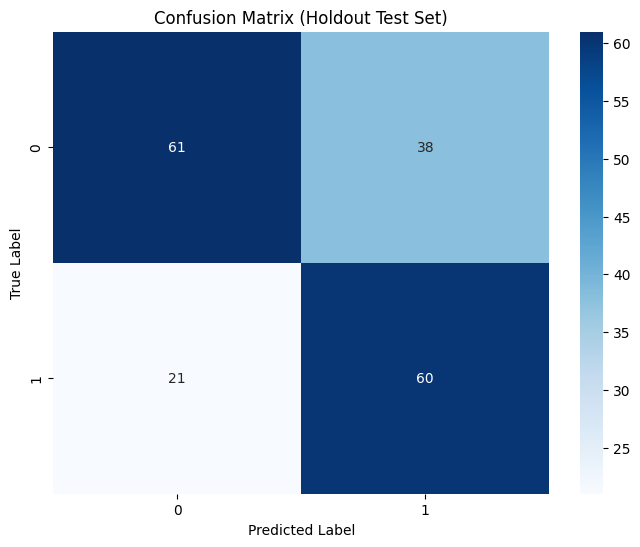

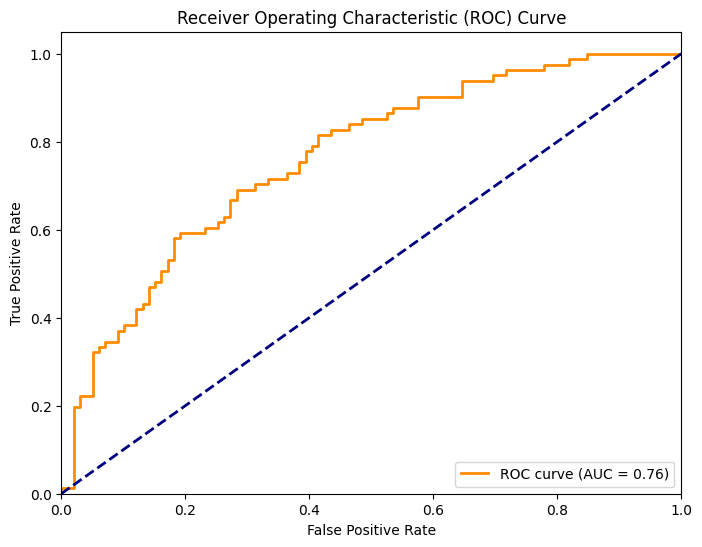

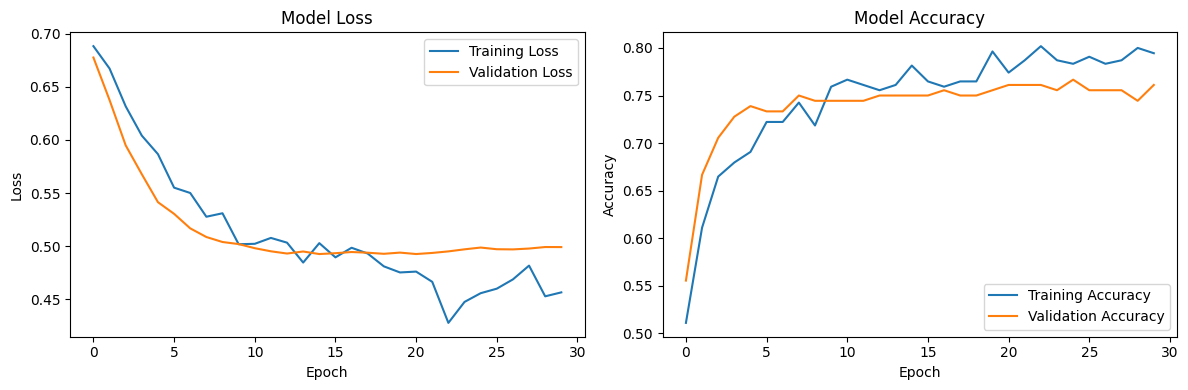

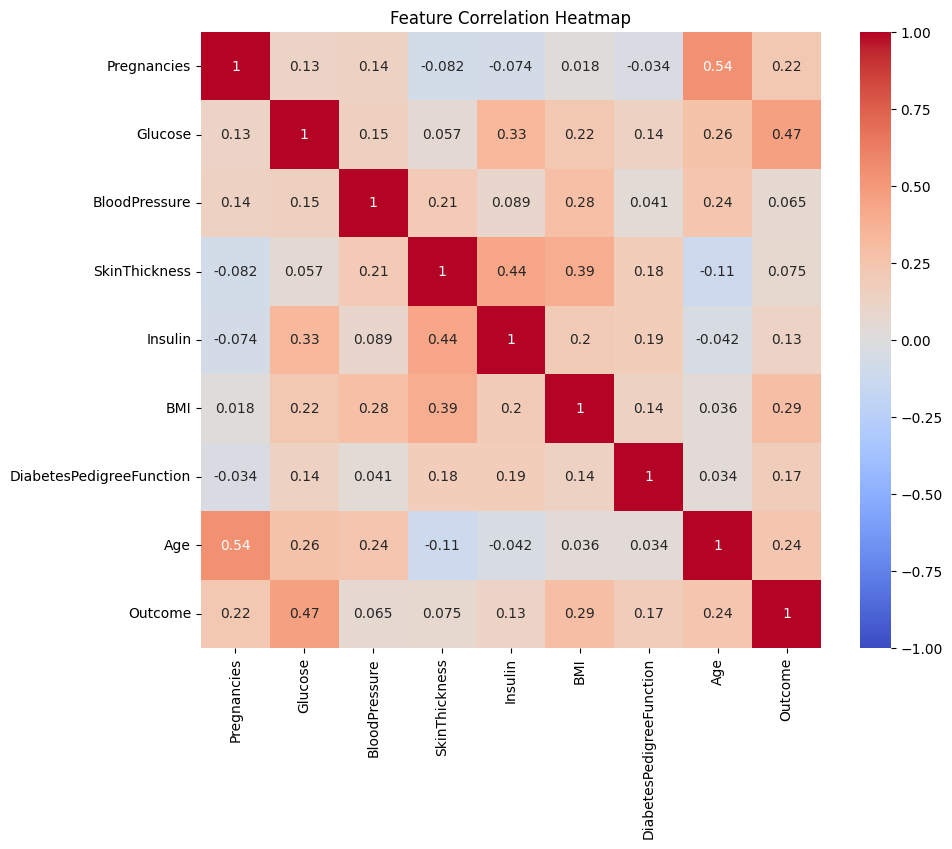

Saving diabetes.csv to diabetes (12).csv


ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.